In [1]:
import os 
os.environ["OMP_NUM_THREADS"] = "1" 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn import decomposition
import seaborn as sns

In [2]:
# Importation de jeu de données :
data = pd.read_csv("data.csv")
customer = pd.read_csv("customer.csv")

In [3]:
pd.set_option("display.max_columns", 5000)
pd.set_option("display.max_rows", 5000)

In [4]:
customer.iloc[0:5]

,customer_unique_id,nb_distinct_product,sum_freight_value,sum_payment,mean_payment_installment,mean_review_score,first_order_purchase_timestamp,last_order_purchase_timestamp,mean_distance_to_seller_km,mean_delivery_period,mean_product_weight_g,cash_payment_percent,credit_card_percent,single_paym_seq_percent,product_categories,order_seasons,payment_types,product_main_categories,frequency,MaxPurchaseDate,recency,activity_period,mean_period_between_orders,mean_price_of_orders,freight_value_percentage,customer_region
0,861eff4711a542e4b93843c6dd7febb0,1,21.88,146.87,2.0,4.0,1494947135000000000,1494947135000000000,346.977593,8.0,8683.0,0.0,1.0,1.0,['office_furniture'],['spring'],['credit_card'],['furniture'],1,1494947135000000000,469.0,0,0,124.99,0.148975,Southeast
1,290c77bc529b7ac935b93aa66c333dc3,1,46.48,335.48,8.0,5.0,1515790104000000000,1515790104000000000,413.953090,16.0,10150.0,0.0,1.0,1.0,['housewares'],['winter'],['credit_card'],['home'],1,1515790104000000000,228.0,0,0,289.00,0.138548,Southeast
2,060e732b5b29e8181a18229c7b0b2b5e,1,17.79,157.73,7.0,5.0,1526746065000000000,1526746065000000000,29.574140,26.0,8267.0,0.0,1.0,1.0,['office_furniture'],['spring'],['credit_card'],['furniture'],1,1526746065000000000,101.0,0,0,139.94,0.112788,Southeast
3,259dac757896d24d7702b9acbbff3f3c,1,23.36,173.30,1.0,5.0,1520957198000000000,1520957198000000000,19.353801,14.0,12160.0,1.0,1.0,1.0,['office_furniture'],['winter'],['credit_card'],['furniture'],1,1520957198000000000,168.0,0,0,149.94,0.134795,Southeast
4,345ecd01c38d18a9036ed96c73b8d066,1,22.25,252.25,8.0,5.0,1532857890000000000,1532857890000000000,219.726628,11.0,5200.0,0.0,1.0,1.0,['home_confort'],['summer'],['credit_card'],['home'],1,1532857890000000000,31.0,0,0,230.00,0.088206,Southeast


In [5]:
customer.shape

(94929, 26)

In [6]:
# Selectionner les variables pertinentes pour la segmentation
customer_seg = customer[['sum_payment', 'mean_review_score', 'mean_delivery_period', 'nb_distinct_product',
                        'frequency', 'recency', 'mean_period_between_orders', 'mean_price_of_orders']]

In [7]:
customer_seg.shape

(94929, 8)

In [8]:
customer_seg.iloc[0:10]

,sum_payment,mean_review_score,mean_delivery_period,nb_distinct_product,frequency,recency,mean_period_between_orders,mean_price_of_orders
0,146.87,4.0,8.0,1,1,469.0,0,124.990
1,335.48,5.0,16.0,1,1,228.0,0,289.000
2,157.73,5.0,26.0,1,1,101.0,0,139.940
3,173.30,5.0,14.0,1,1,168.0,0,149.940
4,252.25,5.0,11.0,1,1,31.0,0,230.000
5,565.88,5.0,11.5,2,2,318.0,1329291000000000,253.260
6,565.88,5.0,11.5,2,2,318.0,1329291000000000,253.260
7,22.77,5.0,1.0,1,1,191.0,0,14.990
8,83.19,5.0,6.5,2,2,223.0,500000000,27.495
9,83.19,5.0,6.5,2,2,223.0,500000000,27.495


In [9]:
# normalisation avec un StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(customer_seg)

In [11]:
# I-Segmentation avec kMeans

In [12]:
# Calculer la somme des distances interclusters 

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
# on regarde la somme des distances interclusters 
# en fonction du nombre de clusters pour determiner
# le nombre de clusters optimal 

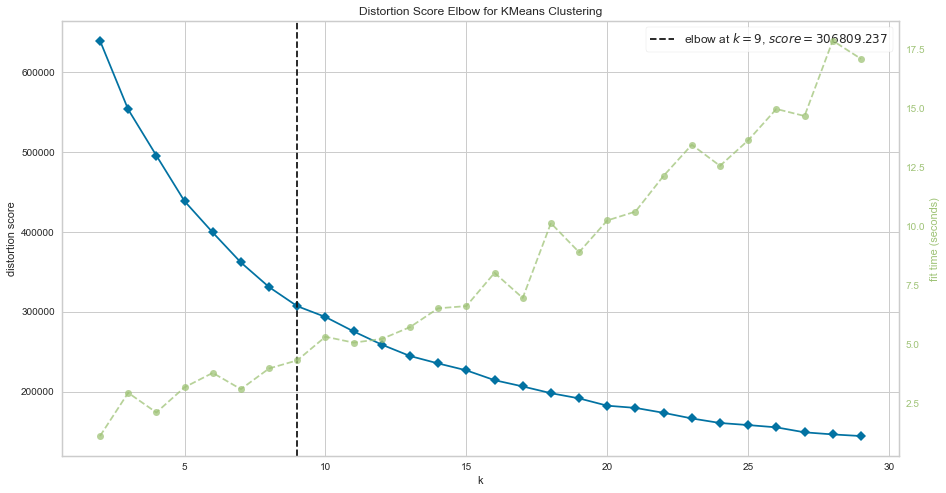

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
# 1- Elbow Méthode pour K-means
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters = i, init = 'k-means++', random_state =10)
# k est la plage du nombre de clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
# Fit data
visualizer.fit(data_normalized)    
visualizer.show() 

In [80]:
# On voit clairement un coude se former sur notre graphique.
# On va déterminer un nombre optimal de clusters.
# On prend un nombre de clusters égale à 9.

Optimal number of clusters based on DB score: [9]


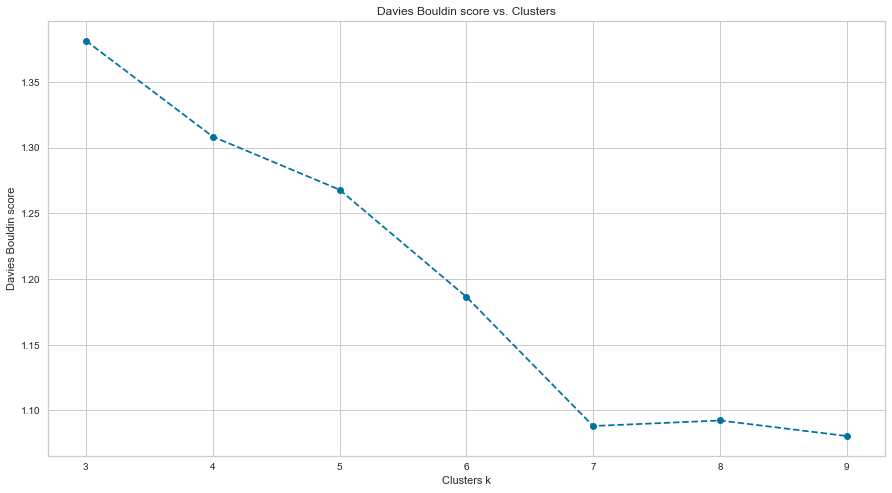

In [82]:
# 2-Davies Bouldin score pour K means

from sklearn.metrics import davies_bouldin_score 

def get_kmeans_score(data, center):

    # definir model
    kmeans = KMeans(n_clusters=center,random_state =10)

    # fit  model
    model = kmeans.fit_predict(data)
    
    # Calcule Silhoutte Score

    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(3,10))

for center in centers:
    scores.append(get_kmeans_score(data_normalized, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Clusters k');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. Clusters');


data_centers = pd.DataFrame(centers,columns=['centers'])
data_centers['scores'] = scores
data_centers_min = data_centers[data_centers.scores == data_centers.scores.min()]
print('Optimal number of clusters based on DB score:', data_centers_min['centers'].tolist())

In [83]:
# Aussi avec le score de Davies Bouldin le nombre de clusters égal à 9.

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 9, init = 'k-means++', random_state =10)
y_kmeans = kmeans.fit_predict(data_normalized)

In [10]:
# On va regarder la distribution de nos clusters
#pour essayer de créer les clusters les plus homogènes possibles

In [11]:
import numpy as np
for i in np.unique(y_kmeans):
    c = sum(y_kmeans == i)
    print(c)

4920
39047
6072
30136
1393
21
1593
11374
373


In [12]:
# Amélioration :
# On voit 7 clusters se former en majorité.
# Nous allons maintenant assigner tous les utilisateurs
# appartenant à des petites classes aux clusters des grandes 
# classes en regardant quel est le centroïde le plus proche.

In [13]:
import numpy as np
cluster_centers = kmeans.cluster_centers_
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
list_indice = []
for i in np.unique(y_kmeans):
    if sum(y_kmeans == i)/len(y_kmeans) < 0.02:
        list_indice.append(i)
        
y_kmeans_small_class = np.unique(y_kmeans)[np.in1d(np.unique(y_kmeans), list_indice)]
y_kmeans_class = np.unique(y_kmeans)[~np.in1d(np.unique(y_kmeans), list_indice)]
cluster_centers = cluster_centers[y_kmeans_class]
for i in y_kmeans_small_class:
        d = customer_seg[y_kmeans == i]
        d_normalized = scaler.fit_transform(d.values)
        for index in range(0, len(d_normalized)):
            row_normalized = d_normalized[index]
            x = np.concatenate([np.array(row_normalized).reshape((len(row_normalized), 1)).transpose(), cluster_centers], axis = 0)
            distance = dist.pairwise(x)[0,:]
            c = y_kmeans_class[np.argmin(distance[1:len(distance)])]
            y_kmeans[y_kmeans == i] = c

In [14]:
import numpy as np
for i in np.unique(y_kmeans):
    c = sum(y_kmeans == i)
    print(c)

4920
39068
6072
30509
14360


In [15]:
# Regarder la distribution de ces classes.

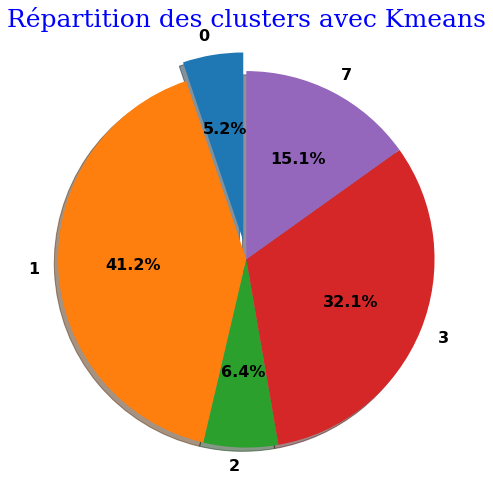

In [16]:
counts_kmeans = []
for i in np.unique(y_kmeans):
    counts_kmeans.append(sum(y_kmeans == i)/len(y_kmeans))
labels_kmeans = np.unique(y_kmeans)

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 25,
        }

explodes_kmeans = np.zeros(len(labels_kmeans))
explodes_kmeans[0] = .1
fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.pie(counts_kmeans, labels=labels_kmeans, explode=explodes_kmeans, autopct='%1.1f%%',shadow=True, startangle=90,normalize=True,
       textprops=dict(color="black",size=16, weight="bold"))
ax1.axis('equal') 
plt.title("Répartition des clusters avec Kmeans", fontdict=font)
plt.show()

In [17]:
# 5 classes sont formés 

In [18]:
# On peut maintenant regarder les caractéristiques
# de chacun de ces clusters en observant
# les caractéristiques de chacun des centroïdes.

<Figure size 864x576 with 0 Axes>

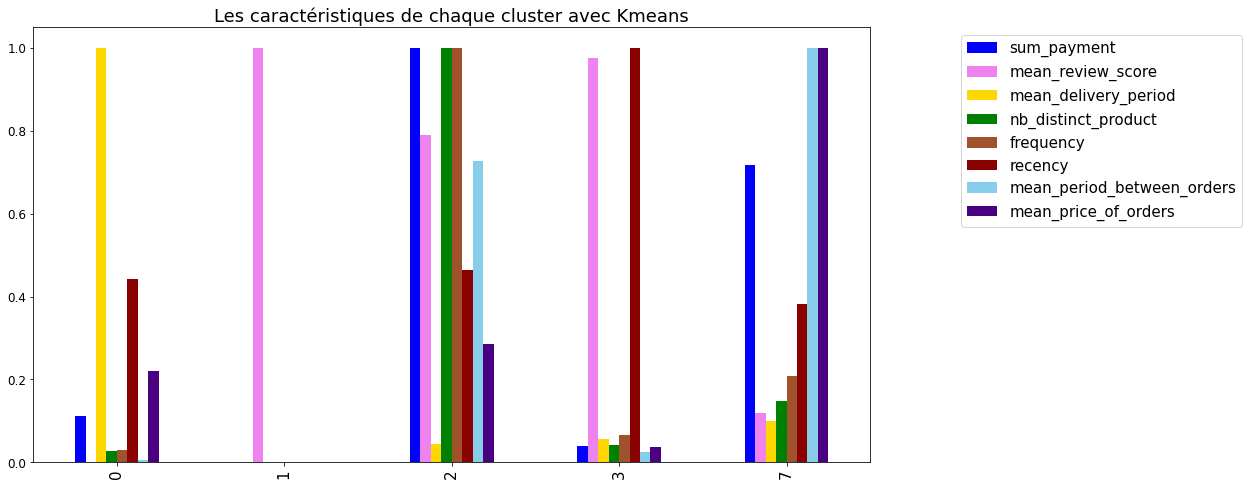

In [19]:
from sklearn.preprocessing import MinMaxScaler
cluster_centers_kmeans = []
for i in np.unique(y_kmeans):
    cluster_centers_kmeans.append(customer_seg[y_kmeans == i].mean().values)
cluster_centers_kmeans = np.array(cluster_centers_kmeans)
mm_sc = MinMaxScaler()
cluster_centers_kmeans = mm_sc.fit_transform(cluster_centers_kmeans)
center_cluster_kmeans = pd.DataFrame(cluster_centers_kmeans, index = y_kmeans_class, columns = customer_seg.columns)
plt.figure(figsize=(12, 8));
plt.rcParams["figure.figsize"] = (15, 8);
ax = center_cluster_kmeans.plot.bar(color=['blue', 'violet', 'gold', 'green', 'sienna','darkred', 'skyblue','indigo']);
ax.legend(bbox_to_anchor=(1.1, 1),fontsize=15)
plt.title("Les caractéristiques de chaque cluster avec Kmeans",fontsize=18);
plt.xticks(fontsize=15);
plt.yticks(fontsize=12);

In [16]:
pd.DataFrame(y_kmeans).to_csv('y_kmeans_base.csv',header=True,index=False)

In [17]:
y_kmeans_base = pd.read_csv('y_kmeans_base.csv')

In [18]:
# Réduction de dimension pour la visualisation

In [131]:
# on va Créer une instance pour chaque 
# algorithme de réduction de dimension

# Instance pour L'algorithme t-SNE
tsne = manifold.TSNE(
            n_components=2, 
            perplexity=30,
            n_iter=300,
            init='pca', 
            random_state=0
        )

# Instance pour L'algorithme PCA
pca = decomposition.PCA(
            n_components=2
        )
X_tsne = tsne.fit_transform(data_normalized)
X_pca = pca.fit_transform(data_normalized)

In [132]:
def plot_clusters(
        standardized_features,
        clusters_labels,
        embedding_algo='tSNE',
        ax=None):
    # Import librairies
    from sklearn import manifold
    from sklearn import decomposition

    # Instance
    if embedding_algo == 'tSNE':
        X_projected = X_tsne

    elif embedding_algo == 'PCA':
        X_projected = X_pca

    if not ax:
        ax = plt.gca()
        plt.gcf().set_figwidth(12)
        plt.gcf().set_figheight(7)

    ax.set_xlim(X_projected[:, 0].min()*1.1, X_projected[:, 0].max()*1.1)
    ax.set_ylim(X_projected[:, 1].min()*1.1, X_projected[:, 1].max()*1.1)

    ax.set_title(embedding_algo, fontsize=20)

    if embedding_algo == 'PCA':
        ax.set_xlabel('First component ({}%)'
                      .format(round(100*pca.explained_variance_ratio_[0], 1)),fontsize=15)
        ax.set_ylabel('Second component ({}%)'
                      .format(round(100*pca.explained_variance_ratio_[1], 1)),fontsize=15)
    else:
        ax.set_xlabel('First component',fontsize=15)
        ax.set_ylabel('Second component',fontsize=15)

    NB_CLUSTERS = \
        len(set(clusters_labels)) - (1 if -1 in clusters_labels else 0)
    color = clusters_labels / NB_CLUSTERS
    ax.scatter(
            X_projected[:, 0],
            X_projected[:, 1],  
            c=color,  
            cmap=plt.cm.get_cmap('Set1'), 
            )

In [133]:
def clustering_plots(algorithm_name, standardized_features, clusters_labels):

    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec

    fig = plt.figure()

    # Set properties of the figure
    fig.set_figheight(7)
    fig.set_figwidth(20)
    fig.suptitle('Visualisation of clustering with {}'
                 .format(algorithm_name), fontsize=20)

    gs = gridspec.GridSpec(nrows=1, ncols=2,)

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    # Remplissage des axes
    plot_clusters(
        standardized_features,
        clusters_labels,
        embedding_algo='tSNE',
        ax=ax1
    )
    plot_clusters(
        standardized_features,
        clusters_labels,
        embedding_algo='PCA',
        ax=ax2
    )

In [22]:
algorithm_name = 'k-means'
standardized_features = data_normalized
clusters_labels = kmeans.labels_

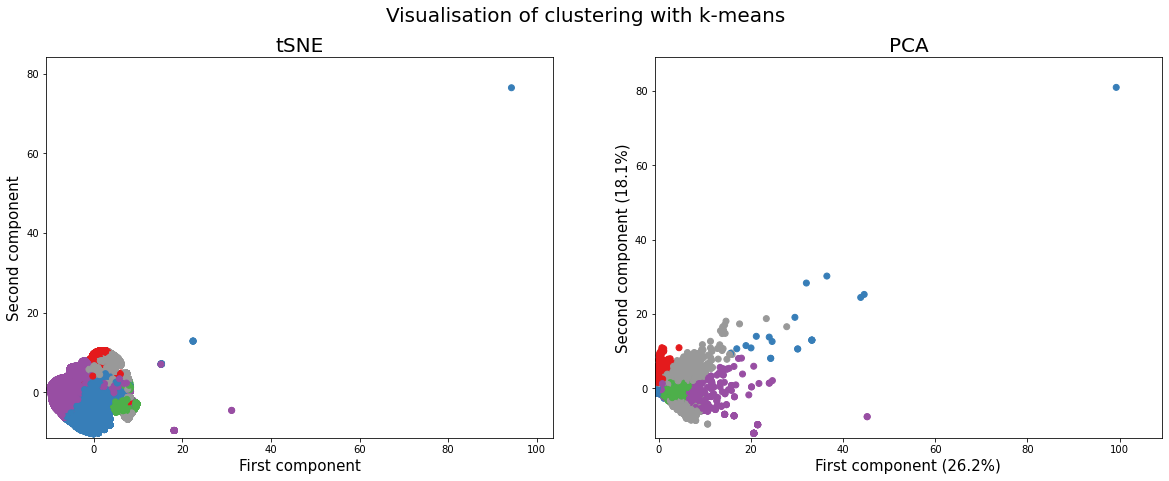

In [23]:
clustering_plots(algorithm_name, standardized_features, clusters_labels)

In [24]:
# on voit que les distances entre les clusters sont peu petites

In [25]:
# Calculer les coefficient de Gini et de Silhouette pour ce modèle

In [23]:
def gini(clusters_labels):
    # frequences de clusters_labels
    clusters_labels = pd.Series(clusters_labels)
    frequencies = clusters_labels.value_counts()

    # Mean absolute difference
    mad = frequencies.mad()

    # Mean frequency des clusters
    mean = frequencies.mean()

    # Gini coefficient
    gini_coeff = 0.5 * mad / mean

    return gini_coeff

In [24]:
# Créeation DataFrame des résultats
global results_df
results_df = pd.DataFrame()

def metrics_clustering(algorithm_name,
                       standardized_features,
                       clusters_labels,
                       results_df):

    from sklearn import metrics

    # Nombre de clusters
    nb_clusters = len(set(clusters_labels)) #\
       # + (1 if -1 in clusters_labels else 0)
    nb_clusters = int(nb_clusters)
    results_df.loc[algorithm_name, 'Nb de clusters estimés'] = nb_clusters

    # Silhouette score
    # -------------------------------------------
    silhouette = metrics.silhouette_score(
        standardized_features,
        clusters_labels
    )
    results_df.loc[algorithm_name, 'Silhouette'] = silhouette

    # Gini coefficient
    # --------------------------------------------
    gini_coeff = gini(clusters_labels)
    results_df.loc[algorithm_name, 'Gini'] = gini_coeff

    # Sort results
    results_df = results_df.sort_values('Silhouette', ascending=False)

    print("")
    return results_df

In [25]:
metrics_clustering(
    algorithm_name,
    standardized_features,
    clusters_labels,
    results_df
)

,Nb de clusters estimés,Silhouette,Gini
k-means,5.0,0.241923,0.332937


In [ ]:
# 3-Amélioration de l'hyper-paramètre du model :
#   on va trouver le nombre de clusters K optimal, basé sur le coefficient de Silhouette

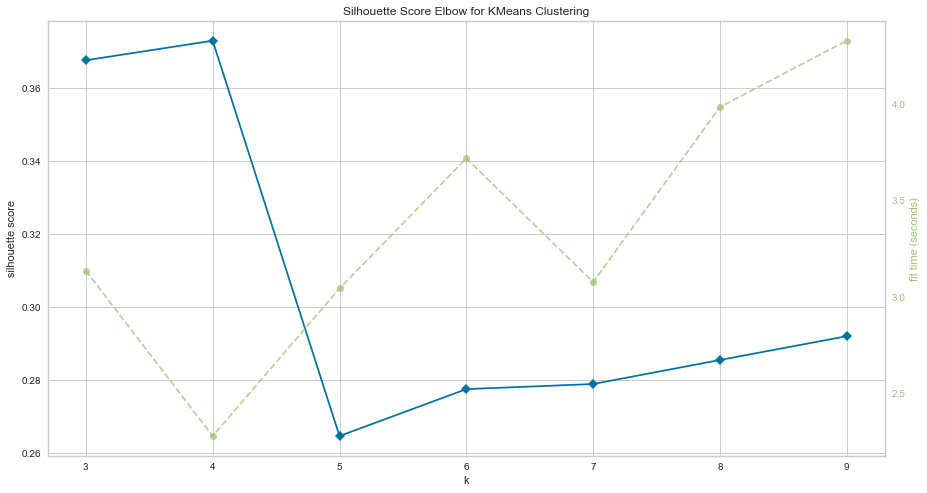

Optimal number of clusters based on silhouette score: [4]


In [81]:
# Silhouette Score pour K-means

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,10),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(data_normalized)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

data_visualizer = pd.DataFrame(visualizer.k_values_,columns=['centers'])
data_visualizer['scores'] = visualizer.k_scores_
data_visualizer_max = data_visualizer[data_visualizer.scores == data_visualizer.scores.max()]
print('Optimal number of clusters based on silhouette score:', data_visualizer_max['centers'].tolist())

In [134]:
# Segmentation avec K-means et k=4
kmeans = KMeans(n_clusters = 4 , init = 'k-means++', random_state =10)
y_kmeans_optimal = kmeans.fit_predict(data_normalized)

In [27]:
import numpy as np
for i in np.unique(y_kmeans_optimal):
    c = sum(y_kmeans_optimal == i)
    print(c)

74304
1440
16092
3093


In [ ]:
# Regarder la distribution de ces classes.

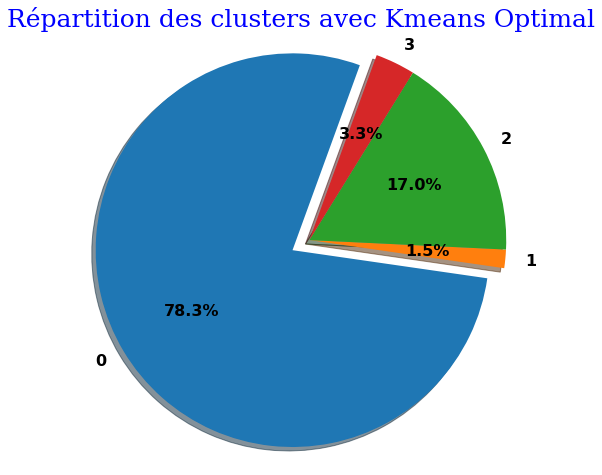

In [38]:
counts_kmeans_optimal = []
for i in np.unique(y_kmeans_optimal):
    counts_kmeans_optimal.append(sum(y_kmeans_optimal == i)/len(y_kmeans_optimal))
labels_kmeans_optimal = np.unique(y_kmeans_optimal)

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 25,
        }

explodes_kmeans_optimal = np.zeros(len(labels_kmeans_optimal))
explodes_kmeans_optimal[0] = .1
fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.pie(counts_kmeans_optimal, labels=labels_kmeans_optimal, explode=explodes_kmeans_optimal, autopct='%1.1f%%',shadow=True, startangle=70,normalize=True,
       textprops=dict(color="black",size=16, weight="bold"))
ax1.axis('equal') 
plt.title("Répartition des clusters avec Kmeans Optimal", fontdict=font)
plt.show()

In [33]:
# On peut maintenant regarder les caractéristiques
# de chacun de ces clusters en observant
# les caractéristiques de chacun des centroïdes.

In [28]:
clusters_labels_optimal = kmeans.labels_
y_kmeans_class_optimal = np.unique(clusters_labels_optimal)

<Figure size 864x576 with 0 Axes>

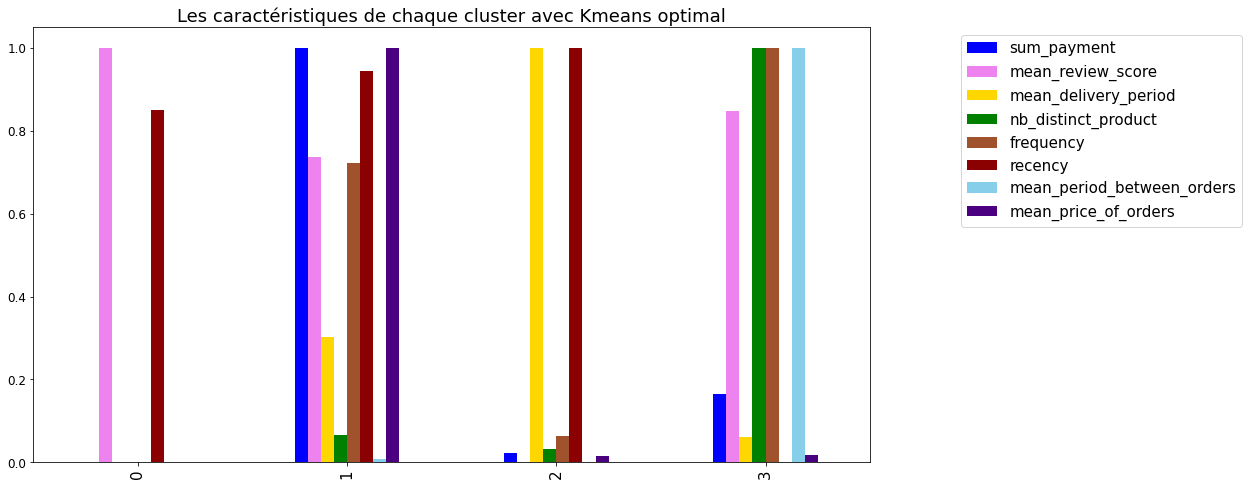

In [37]:
from sklearn.preprocessing import MinMaxScaler
cluster_centers_kmeans_optimal = []
for i in np.unique(y_kmeans_optimal):
    cluster_centers_kmeans_optimal.append(customer_seg[y_kmeans_optimal == i].mean().values)
cluster_centers_kmeans_optimal = np.array(cluster_centers_kmeans_optimal)
mm_sc = MinMaxScaler()
cluster_centers_kmeans_optimal = mm_sc.fit_transform(cluster_centers_kmeans_optimal)
center_cluster_kmeans_optimal = pd.DataFrame(cluster_centers_kmeans_optimal, index = y_kmeans_class_optimal, columns = customer_seg.columns)
plt.figure(figsize=(12, 8));
plt.rcParams["figure.figsize"] = (15, 8);
ax = center_cluster_kmeans_optimal.plot.bar(color=['blue', 'violet', 'gold', 'green', 'sienna','darkred', 'skyblue','indigo']);
ax.legend(bbox_to_anchor=(1.1, 1),fontsize=15)
plt.title("Les caractéristiques de chaque cluster avec Kmeans optimal",fontsize=18);
plt.xticks(fontsize=15);
plt.yticks(fontsize=12);

In [135]:
algorithm_name = 'k-means optimal'
standardized_features = data_normalized
clusters_labels = kmeans.labels_

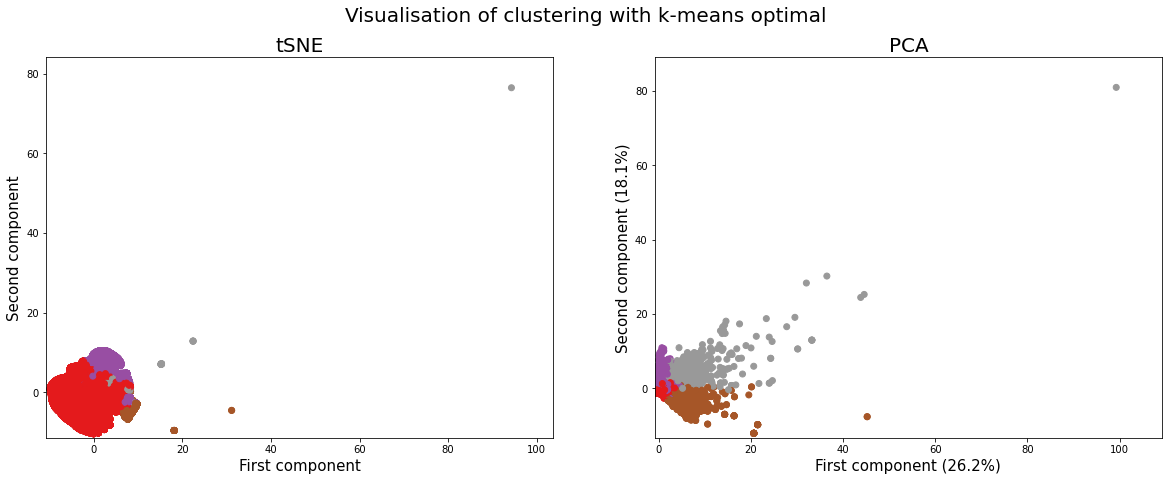

In [136]:
clustering_plots(algorithm_name, standardized_features, clusters_labels)

In [30]:
# Calculer les coefficient de Gini et de Silhouette pour ce model

In [31]:
metrics_clustering(
    algorithm_name,
    standardized_features,
    clusters_labels,
    results_df
)

,Nb de clusters estimés,Silhouette,Gini
k-means optimal,4.0,0.372911,0.532732
k-means,5.0,0.241923,0.332937


In [ ]:
# on voit les deux scores sont augmentés et un cluster en moins 

In [49]:
pd.DataFrame(clusters_labels_optimal).to_csv('clusters_labels_optimal.csv',header=True,index=False)

In [ ]:
# Encore une fois essayons, d'améliorer le modèle avec un GridSearch

In [32]:
import numpy as np
from sklearn.base import BaseEstimator


class GridSearch(BaseEstimator):
    """Classe permettant d'implémenter une recherche exhaustive sur grille
    (sans validation croisée) pour les algorithmes de clustering."""

    # init
    # ------------------------------------------------------------------------------
    def __init__(
            self,
            estimator, 
            param_grid,  
            scoring=None):
        """Méthode d'initialisation prenant en entrée le modèle
        à tester et la grille de paramètres."""

        # les paramètres
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = scoring

    #  fit
    # ------------------------------------------------------------------------------
    def fit(self, X):
        """Méthode permettant de réaliser la recherche sur grille,
        et renvoyant le meilleur modèle trouvé, ré-entraîné sur les données."""

        # initialisation  dict des résultats
        self.results_ = {"scores": [],
                         "params": [],
                         "models": [],
                         "fit_times": [],
                         "nb_clusters": [],
                         "gini_coef": []}

        # modules
        from sklearn.model_selection import ParameterGrid

        # itérations sur toutes les combinaisons de paramètres
        for param_combination in ParameterGrid(param_grid):


            model = self.estimator(**param_combination)

            #  training time 
            time_train = %timeit -n1 -r1 -o -q model.fit(X)
            time_train = time_train.average

            # Score du model
            if not self.scoring:  
                model_score = model.score(X)
            else:  
                try:
                    labels = model.labels_
                    model_score = self.scoring(X, labels)
                except:
                    model_score = np.nan

            # Calcul Nb des clusters, 
            nb_clusters = \
                len(set(model.labels_)) 
            nb_clusters = int(nb_clusters)

            # calcul Gini coefficient
            gini_coeff = gini(model.labels_)

            #  dict paramètres 
            self.results_["scores"].append(model_score)  # scores
            self.results_["params"].append(param_combination)  # paramètres
            self.results_["models"].append(model)  # traing modèles
            self.results_["fit_times"].append(time_train)  # training time
            self.results_["gini_coef"].append(gini_coeff)  # Gini coefficient
            self.results_["nb_clusters"].append(nb_clusters)  # nb des clusters

        # Selection best model 
        # -----------------------------------
        best_model_index, best_score = None, None 
        for index, score in enumerate(self.results_["scores"]):

            # initialisation
            if not best_score:
                best_score = score
                best_model_index = index

            # si score mieux que current best_score
            if score > best_score:
                best_score = score
                best_model_index = index

    
        self.best_score_ = self.results_["scores"][best_model_index]
        self.best_params_ = self.results_["params"][best_model_index]
        self.best_estimator_ = self.results_["models"][best_model_index]
        self.best_index_ = best_model_index
        self.refit_time_ = self.results_["fit_times"][best_model_index]

        return self

    # prédiction
    # ------------------------------------------------------------------------------
    def predict(self, X_test):
        return self.best_model.predict(X_test)

In [ ]:
# Kmeans Gridsearch

In [33]:
# Espace de recherche de hyperparamètre
param_grid = {
    "n_clusters":  range(3, 10),  # nb des clusters
}

In [34]:
# importing modules
from sklearn import cluster
from sklearn.metrics import silhouette_score

# instanciation
kmeans_search = GridSearch(
    estimator=cluster.MiniBatchKMeans,
    param_grid=param_grid,
    scoring=silhouette_score,
)

In [35]:
# importing modules
from sklearn import cluster
from sklearn.metrics import silhouette_score

# grid search
kmeans_search.fit(data_normalized)

#  paramètres
print("Best hyperparameters:", kmeans_search.best_params_)
print("Best Silhouette score:", kmeans_search.best_score_)
print("Training time:", kmeans_search.refit_time_)

Best hyperparameters: {'n_clusters': 7}
Best Silhouette score: 0.28386027888847926
Training time: 0.1192323000000215


In [36]:
algorithm_name = 'k-means Gridsearch'
standardized_features = data_normalized
clusters_labels_search = kmeans_search.best_estimator_.labels_

In [37]:
pd.DataFrame(clusters_labels_search).to_csv('clusters_labels_search.csv',header=True,index=False)

In [38]:
import numpy as np
for i in np.unique(clusters_labels_search):
    c = sum(clusters_labels_search == i)
    print(c)

27727
42075
1192
14205
5763
720
3247


In [39]:
metrics_clustering(
    algorithm_name,
    standardized_features,
    clusters_labels_search,
    results_df
)

,Nb de clusters estimés,Silhouette,Gini
k-means optimal,4.0,0.372911,0.532732
k-means Gridsearch,7.0,0.283860,0.456374
k-means,5.0,0.241923,0.332937


In [40]:
y_kmeans_class_search = np.unique(clusters_labels_search)

<Figure size 864x576 with 0 Axes>

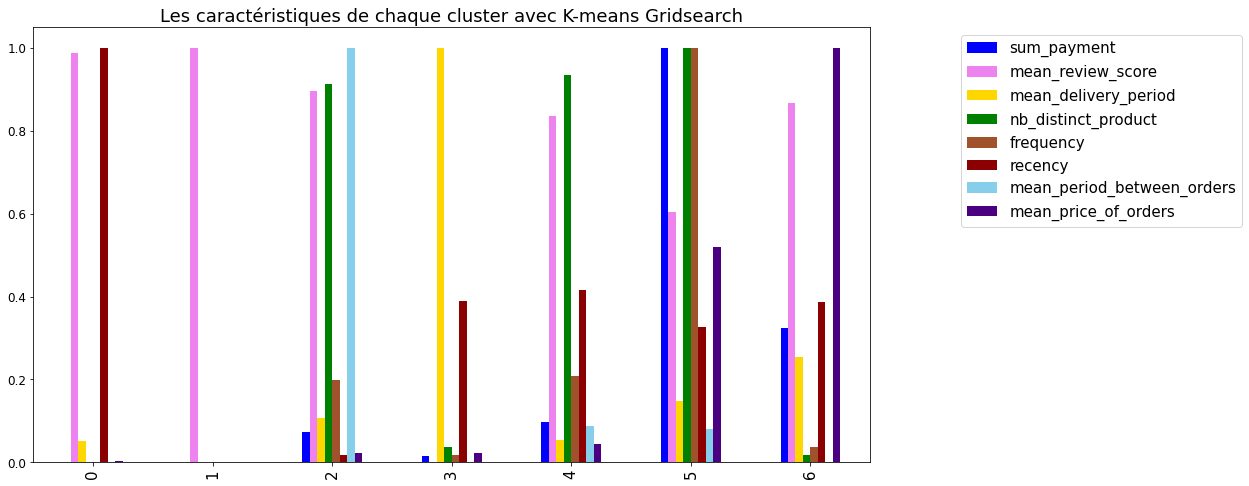

In [41]:
from sklearn.preprocessing import MinMaxScaler
cluster_centers_search = []
for i in np.unique(clusters_labels_search):
    cluster_centers_search.append(customer_seg[clusters_labels_search == i].mean().values)
cluster_centers_search = np.array(cluster_centers_search)
mm_sc = MinMaxScaler()
cluster_centers_search = mm_sc.fit_transform(cluster_centers_search)
center_search = pd.DataFrame(cluster_centers_search, index = y_kmeans_class_search, columns = customer_seg.columns)
plt.figure(figsize=(12, 8));
plt.rcParams["figure.figsize"] = (15, 8);
ax = center_search.plot.bar(color=['blue', 'violet', 'gold', 'green', 'sienna','darkred', 'skyblue', 'indigo']);
ax.legend(bbox_to_anchor=(1.1, 1),fontsize=15)
plt.title("Les caractéristiques de chaque cluster avec K-means Gridsearch",fontsize=18);
plt.xticks(fontsize=15);
plt.yticks(fontsize=12);

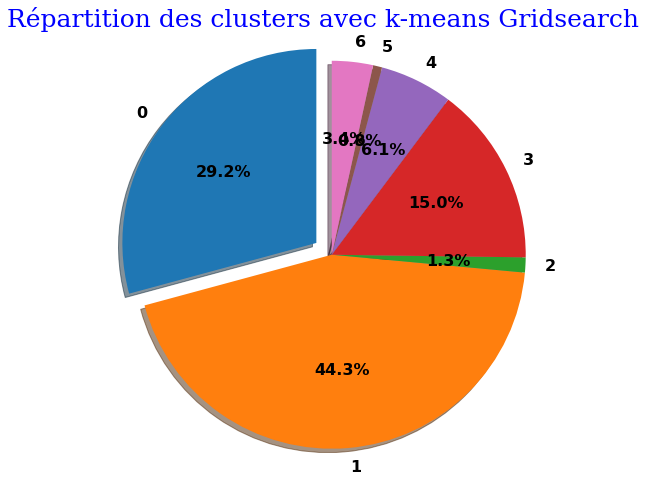

In [44]:
counts_search = []
for i in np.unique(clusters_labels_search):
    counts_search.append(sum(clusters_labels_search == i)/len(clusters_labels_search))
labels_search = y_kmeans_class_search

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 25,
        }

explodes = np.zeros(len(y_kmeans_class_search))
explodes[0] = .1
fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.pie(counts_search, labels=labels_search, explode=explodes, autopct='%1.1f%%',shadow=True, startangle=90,normalize=True,
       textprops=dict(color="black",size=16, weight="bold"))
ax1.axis('equal') 
plt.title("Répartition des clusters avec k-means Gridsearch", fontdict=font)
plt.show()

In [ ]:
# Segmentation avec DBSCAN

In [12]:
param_grid = {
    # maximum distance définit neighborhood
    'eps': [0.5, 1, 3],
    # nb des neighbors 
    'min_samples': range(4, 30),
    'n_jobs': [-1]
}

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# instanciation
dbscan_search = GridSearch(
    estimator=DBSCAN,
    param_grid=param_grid,
    scoring=silhouette_score,
)

# grid search
dbscan_search.fit(data_normalized)

# paramètres
print("Best hyperparameters:", dbscan_search.best_params_)
print("Best Silhouette score:", dbscan_search.best_score_)
print("Training time:", dbscan_search.refit_time_)

0.5195954463542864


<Figure size 360x360 with 0 Axes>

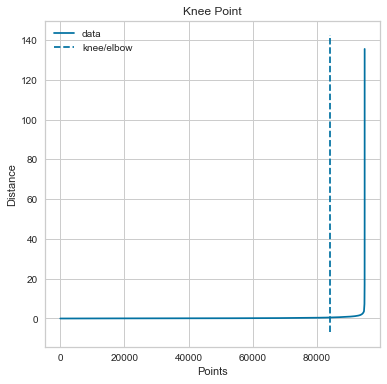

In [125]:
# Paramètres pour eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data_normalized)
distances, indices = neighbors.kneighbors(data_normalized)
distances = np.sort(distances[:,10], axis=0)

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Optimal number of min_samples based on silhouette score: [26]


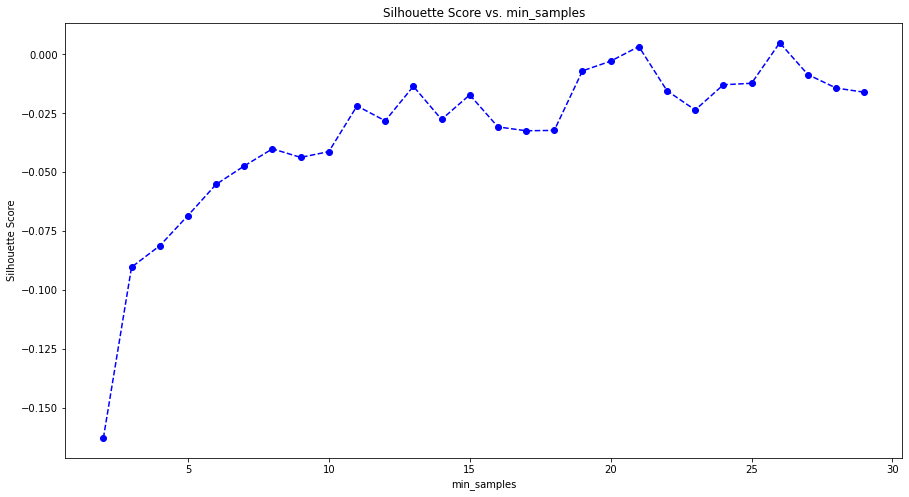

In [46]:
# Silhouette Score pour DBSCAN 
# pour trouver min_samples optimal

from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):

    # instance
    dbscan = DBSCAN(eps= 0.5195954463542864, min_samples=center)
 
    # fit model
    model = dbscan.fit(data_normalized)
    
    # Calcul Silhoutte Score

    score = silhouette_score(data_normalized, model.labels_, metric='euclidean')
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(data_normalized, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

data_centers = pd.DataFrame(centers,columns=['min_samples'])
data_centers['scores'] = scores
data_centers_max = data_centers[data_centers.scores == data_centers.scores.max()]
print('Optimal number of min_samples based on silhouette score:', data_centers_max['min_samples'].tolist())

Optimal number of min_samples based on DB score: [2]


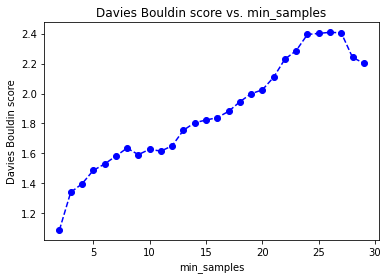

In [21]:
# Davies Bouldin score aussi pour trouver min_samples optimal

from sklearn.metrics import davies_bouldin_score 

def get_dbscan_score(data, center):

    #instance dbscan
    dbscan = DBSCAN(eps= 0.5195954463542864, min_samples=center)

    # fit model
    model = dbscan.fit_predict(data_normalized)
    
    # Calcul Silhoutte Score

    score = davies_bouldin_score(data_normalized, model)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(data_normalized, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


data_centers = pd.DataFrame(centers,columns=['min_samples'])
data_centers['scores'] = scores
data_centers_min = data_centers[data_centers.scores == data_centers.scores.min()]
print('Optimal number of min_samples based on DB score:', data_centers_min['min_samples'].tolist())

In [47]:
# on choisit 26 comme min_samples 
# définir le model
model_dbscan = DBSCAN(eps=0.5195954463542864, min_samples = 26)

In [48]:
# fit model et predict clusters
clusters_labels_dbscan = model_dbscan.fit_predict(data_normalized)

# uniques clusters
dbscan_class = np.unique(clusters_labels_dbscan)

In [49]:
import numpy as np
for i in np.unique(clusters_labels_dbscan):
    c = sum(clusters_labels_dbscan == i)
    print(c)

11496
15263
46064
2120
6057
2011
4307
6242
83
706
381
93
31
22
27
26


In [ ]:
# Nous allons maintenant assigner tous les utilisateurs
# appartenant à des petites classes aux clusters des grandes 
# classes en regardant quel est le centroïde le plus proche.

In [50]:
import numpy as np
cluster_centers = model_dbscan.components_
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
list_indice = []
for i in np.unique(clusters_labels_dbscan):
    if sum(clusters_labels_dbscan == i)/len(clusters_labels_dbscan) < 0.02:
        list_indice.append(i)
        
y_dbscan_small_class = np.unique(clusters_labels_dbscan)[np.in1d(np.unique(clusters_labels_dbscan), list_indice)]
y_dbscan_class = np.unique(clusters_labels_dbscan)[~np.in1d(np.unique(clusters_labels_dbscan), list_indice)]
cluster_centers = cluster_centers[y_dbscan_class]
for i in y_dbscan_small_class:
        d = customer_seg[clusters_labels_dbscan == i]
        d_normalized = scaler.fit_transform(d.values)
        for index in range(0, len(d_normalized)):
            row_normalized = d_normalized[index]
            x = np.concatenate([np.array(row_normalized).reshape((len(row_normalized), 1)).transpose(), cluster_centers], axis = 0)
            distance = dist.pairwise(x)[0,:]
            c = y_dbscan_class[np.argmin(distance[1:len(distance)])]
            clusters_labels_dbscan[clusters_labels_dbscan == i] = c

In [51]:
import numpy as np
for i in np.unique(clusters_labels_dbscan):
    c = sum(clusters_labels_dbscan == i)
    print(c)

11589
15312
46445
2151
6057
2037
5096
6242


In [53]:
algorithm_name = 'DBSCAN optimale'
standardized_features = data_normalized
clusters_labels_dbscan = clusters_labels_dbscan

In [54]:
metrics_clustering(
    algorithm_name,
    standardized_features,
    clusters_labels_dbscan,
    results_df
)

,Nb de clusters estimés,Silhouette,Gini
k-means optimal,4.0,0.372911,0.532732
k-means Gridsearch,7.0,0.283860,0.456374
k-means,5.0,0.241923,0.332937
DBSCAN optimale,8.0,0.044939,0.400560


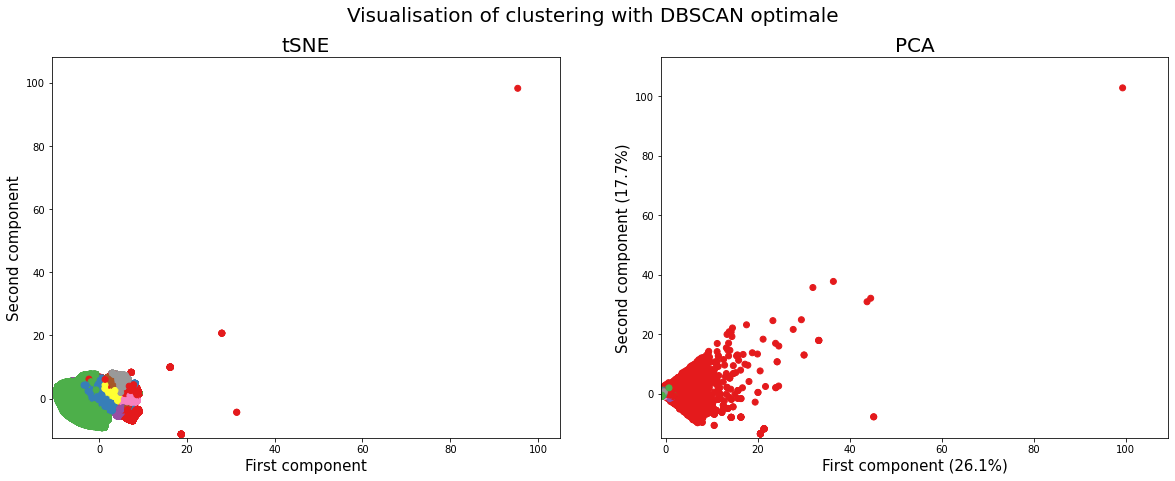

In [82]:
clustering_plots(algorithm_name, standardized_features, clusters_labels_dbscan)

<Figure size 1152x720 with 0 Axes>

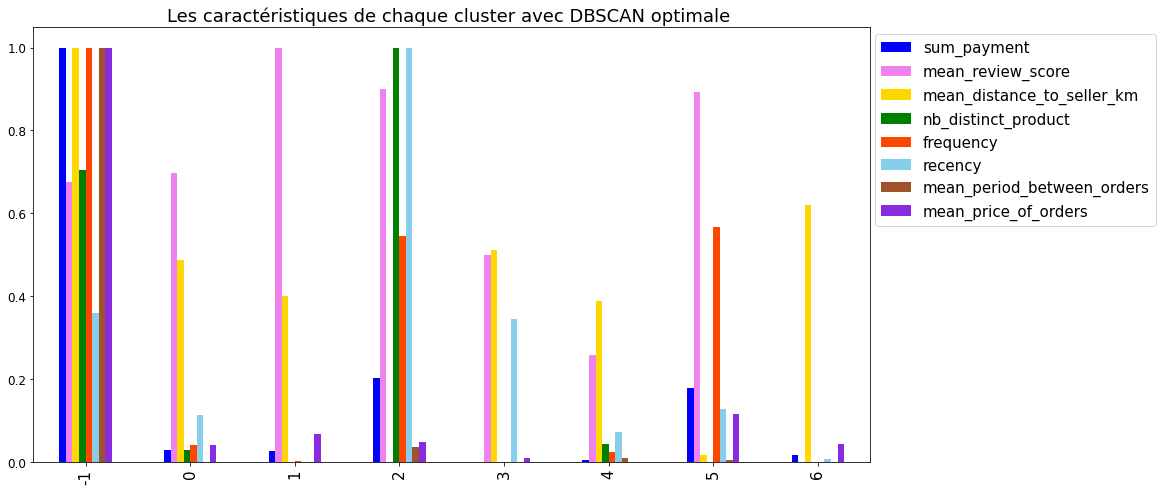

In [112]:
from sklearn.preprocessing import MinMaxScaler
cluster_centers_dbscan = []
for i in np.unique(clusters_labels_dbscan):
    cluster_centers_dbscan.append(customer_seg[clusters_labels_dbscan == i].mean().values)
cluster_centers_dbscan = np.array(cluster_centers_dbscan)
mm_sc = MinMaxScaler()
cluster_centers_dbscan = mm_sc.fit_transform(cluster_centers_dbscan)
center_dbscan = pd.DataFrame(cluster_centers_dbscan, index = y_dbscan_class, columns = customer_seg.columns)
plt.figure(figsize=(16, 10));
plt.rcParams["figure.figsize"] = (15, 8);
ax = center_dbscan.plot.bar(color=['blue', 'violet', 'gold', 'green', 'orangered','skyblue', 'sienna', 'blueviolet', 'indigo']);
ax.legend(bbox_to_anchor=(1.35, 1),fontsize=15)
plt.title("Les caractéristiques de chaque cluster avec DBSCAN optimale ",fontsize=18);
plt.xticks(fontsize=15);
plt.yticks(fontsize=12);

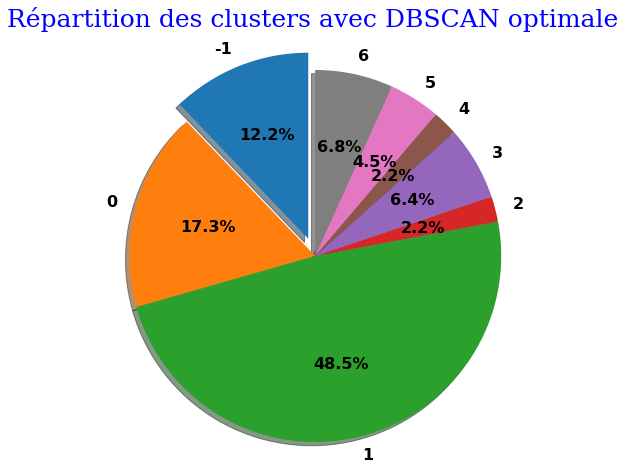

In [41]:
counts_dbscan = []
for i in np.unique(clusters_labels_dbscan):
    counts_dbscan.append(sum(clusters_labels_dbscan == i)/len(clusters_labels_dbscan))
labels_dbscan = y_dbscan_class

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 25,
        }

explodes_dbscan = np.zeros(len(labels_dbscan))
explodes_dbscan[0] = .1
fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.pie(counts_dbscan, labels=labels_dbscan, explode=explodes_dbscan, autopct='%1.1f%%',shadow=True, startangle=90,normalize=False,
       textprops=dict(color="black",size=16, weight="bold"))
ax1.axis('equal') 
plt.title("Répartition des clusters avec DBSCAN optimale ", fontdict=font)
plt.show()

In [83]:
# importation 
pd.DataFrame(clusters_labels_dbscan).to_csv('clusters_labels_dbscan.csv',header=True,index=False)

In [ ]:
# Ségmentation hiérarchique :

In [87]:
# Espace de recherche des hyperparamètres
param_grid = [
    {
        # clusters
        'n_clusters': range(3, 10),
        # linkage
        'linkage': ['complete', 'average', 'single'],
        # Metrique pour linkage
        'affinity': ['euclidean', 'manhattan', 'cosine']
    },

    {
        'n_clusters': range(3, 10),  # clusters
        'linkage': ['ward'],  # linkage 
    }
]

In [88]:
# import des modules
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# GridSearch pour sélectionner les hyper-paramètres
hierarchy_search = GridSearch(
    estimator=AgglomerativeClustering,
    param_grid=param_grid,
    scoring=silhouette_score,
)

hierarchy_search.fit(data_normalized)

GridSearch(estimator=<class 'sklearn.cluster._agglomerative.AgglomerativeClustering'>,
           param_grid=[{'affinity': ['euclidean', 'manhattan', 'cosine'],
                        'linkage': ['complete', 'average', 'single'],
                        'n_clusters': range(4, 10)},
                       {'linkage': ['ward'], 'n_clusters': range(4, 10)}],
           scoring=<function silhouette_score at 0x000001BE1B7F4AF0>)

In [89]:
# paramètres
print("Best hyperparameters:", hierarchy_search.best_params_)
print("Best Silhouette score:", hierarchy_search.best_score_)
print("Training time:", hierarchy_search.refit_time_)

Best hyperparameters: {'affinity': 'euclidean', 'linkage': 'single', 'n_clusters': 4}
Best Silhouette score: 0.9478637199344059
Training time: 27.437909999999647


In [56]:
# définir le modèle
model_hierarchy= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')

In [57]:
# fit model et predict clusters
clusters_labels_hierarchy = model_hierarchy.fit_predict(data_normalized)

# uniques clusters
hierarchy_class = np.unique(clusters_labels_hierarchy)

In [58]:
algorithm_name = 'hierarchical clustering'
standardized_features = data_normalized
clusters_labels_hierarchy = clusters_labels_hierarchy

In [59]:
import numpy as np
for i in np.unique(clusters_labels_hierarchy):
    c = sum(clusters_labels_hierarchy == i)
    print(c)

94924
2
2
1


In [60]:
metrics_clustering(
    algorithm_name,
    standardized_features,
    clusters_labels_hierarchy,
    results_df
)

,Nb de clusters estimés,Silhouette,Gini
hierarchical clustering,4.0,0.955943,0.749947
k-means optimal,4.0,0.372911,0.532732
k-means Gridsearch,7.0,0.283860,0.456374
k-means,5.0,0.241923,0.332937
DBSCAN optimale,8.0,0.044939,0.400560


<Figure size 1152x720 with 0 Axes>

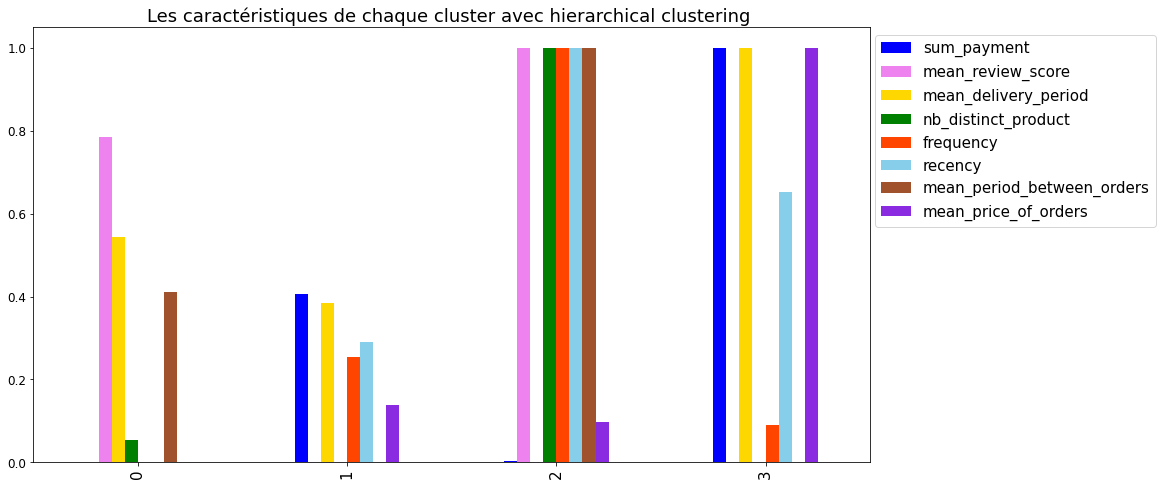

In [61]:
from sklearn.preprocessing import MinMaxScaler
cluster_centers_hierarchy = []
for i in np.unique(clusters_labels_hierarchy):
    cluster_centers_hierarchy.append(customer_seg[clusters_labels_hierarchy == i].mean().values)
cluster_centers_hierarchy = np.array(cluster_centers_hierarchy)
mm_sc = MinMaxScaler()
cluster_centers_hierarchy = mm_sc.fit_transform(cluster_centers_hierarchy)
center_hierarchy = pd.DataFrame(cluster_centers_hierarchy, index = hierarchy_class, columns = customer_seg.columns)
plt.figure(figsize=(16, 10));
plt.rcParams["figure.figsize"] = (15, 8);
ax = center_hierarchy.plot.bar(color=['blue', 'violet', 'gold', 'green', 'orangered','skyblue', 'sienna', 'blueviolet','indigo']);
ax.legend(bbox_to_anchor=(1.35, 1),fontsize=15)
plt.title("Les caractéristiques de chaque cluster avec hierarchical clustering ",fontsize=18);
plt.xticks(fontsize=15);
plt.yticks(fontsize=12);

Text(0.5, 1.0, 'Répartition des clusters avec hierarchical clustering ')

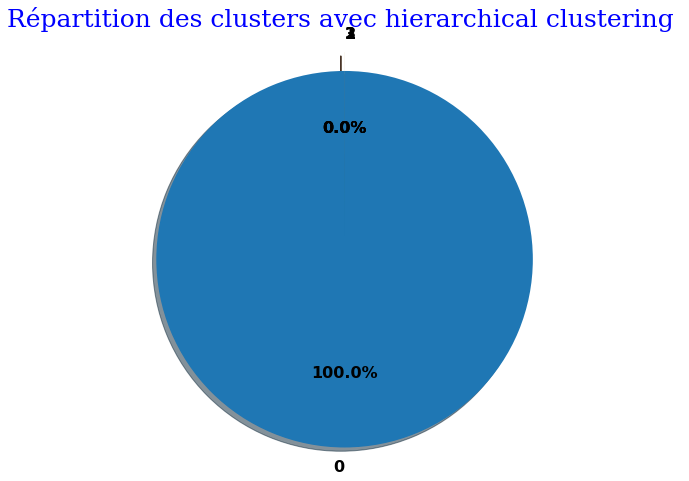

In [99]:
counts_hierarchy = []
for i in np.unique(clusters_labels_hierarchy):
    counts_hierarchy.append(sum(clusters_labels_hierarchy == i)/len(clusters_labels_hierarchy))
labels_hierarchy = hierarchy_class

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 25,
        }

explodes_hierarchy = np.zeros(len(labels_hierarchy))
explodes_hierarchy[0] = .1
fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.pie(counts_hierarchy, labels=labels_hierarchy, explode=explodes_hierarchy, autopct='%1.1f%%',shadow=True, startangle=90,normalize=False,
       textprops=dict(color="black",size=16, weight="bold"))
ax1.axis('equal') 
plt.title("Répartition des clusters avec hierarchical clustering ", fontdict=font)

In [14]:
# Conclusion : le modèle selectionné pour notre segmentation est K-means avec 4 clusters. 
#              le coefficient de silhouette est 0.37 et le coefficient de Gini est 0.53 
#              ces deux coefficients sont meilleurs par rapport aux autres puisque 
#              hierarchical clustering avec ses meilleurs scores, a produit 3 clusters
#              chacun contient une ou 2 observations.

In [15]:
# Analyse de clusters identifiés avec le modèle selectionné:

In [5]:
import datetime
customer['activity_period'] = pd.to_timedelta(
        customer['activity_period']).dt.days
customer['mean_period_between_orders'] = pd.to_timedelta(
        customer['mean_period_between_orders']).dt.days

In [6]:
# Analyse statistique :
clusters_labels_optimal_kmeans = pd.read_csv('clusters_labels_optimal.csv')
clusters_labels_optimal_kmeans.columns =['cluster_kmeans_optimal']
clusters_labels_optimal_kmeans['customer_unique_id'] = customer.customer_unique_id
customer['cluster_kmeans_optimal']=clusters_labels_optimal_kmeans.cluster_kmeans_optimal
customer.groupby(['cluster_kmeans_optimal']).describe()

nb_distinct_product                                     \
                                     count      mean       std  min  25%  50%   
cluster_kmeans_optimal                                                          
0                                  74304.0  1.043712  0.204456  1.0  1.0  1.0   
1                                   1440.0  1.152083  0.530969  1.0  1.0  1.0   
2                                  16092.0  1.099118  0.311855  1.0  1.0  1.0   
3                                   3093.0  2.718396  1.396693  1.0  2.0  2.0   

                                  sum_freight_value                          \
                        75%   max             count        mean         std   
cluster_kmeans_optimal                                                        
0                       1.0   2.0           74304.0   22.120926   17.466796   
1                       1.0   8.0            1440.0  105.634944  126.608121   
2                       1.0   3.0           16092.0   28.332559   24.649670   
3                       3.0  13.0            3093.0   63.551080   59.439117   

                                                              sum_payment  \
                          min    25%    50%      75%      max       count   
cluster_kmeans_optimal                                                      
0                        0.00  13.66  17.09   24.050   508.90     74304.0   
1                        0.84  37.11  65.87  125.005  1794.96      1440.0   
2                        0.00  15.26  19.60   33.530   625.38     16092.0   
3                       15.10  33.87  48.17   72.550  1405.98      3093.0   

                                                                             \
                               mean          std    min       25%       50%   
cluster_kmeans_optimal                                                        
0                        160.202458   176.237140   9.59    61.720   106.380   
1                       2743.820160  4487.454623  62.68  1226.675  1693.975   
2                        217.628790   256.941650  13.89    72.130   132.950   
3                        583.148067   674.084741  40.85   201.960   359.400   

                                             mean_payment_installment  \
                              75%        max                    count   
cluster_kmeans_optimal                                                  
0                        185.0000    2232.00                  74304.0   
1                       2807.0625  109312.64                   1440.0   
2                        249.4825    2714.40                  16092.0   
3                        718.7500    9773.81                   3093.0   

                                                                       \
                            mean       std  min  25%  50%   75%   max   
cluster_kmeans_optimal                                                  
0                       2.804210  2.586846  1.0  1.0  2.0   4.0  24.0   
1                       5.699871  4.049426  1.0  1.0  6.0  10.0  24.0   
2                       3.087020  2.797206  1.0  1.0  2.0   4.0  24.0   
3                       3.502620  2.751737  1.0  1.0  2.5   5.0  18.0   

                       mean_review_score                                     \
                                   count      mean       std  min       25%   
cluster_kmeans_optimal                                                        
0                                74304.0  4.656309  0.579805  3.0  4.000000   
1                                 1440.0  3.896595  1.469398  1.0  3.000000   
2                                16092.0  1.774366  0.979321  1.0  1.000000   
3                                 3093.0  4.217516  1.046476  1.0  3.666667   

                                           first_order_purchase_timestamp  \
                             50%  75%  max                          count   
cluster_kmeans_optimal                                                     

In [16]:
# Nous pouvons maintenant identifier les différents clients :
 
# Cluster 0  : représente les utilisateurs économistes satisfaits
#             (median de sum_payment 106.380 le plut petit par rapport aux autres clusters)
#             plus 75 % de ce cluster ont mean_review_score élevé 5
#             ils reviennent peu souvent sur le site plus 75 % ont acheté une seule fois 

# Cluster 1 : représente les utilisateurs dépenseurs satisfaits
#             Ils dépensent une grande somme par order
#             50 % ont depensé plus 1693 beaucoup plus que les autres clusters 
#             mais ne reviennent pas assez souvent

# Cluster 2 : représente les utilisateurs insatisfaits plus 75 % avec mean_review_score 3
#             le delais de livraison pour ses achats est long
#             50 % de ce cluster ont une delai de livraison plus 18 jours et
#             ce delai est plus 29 jours pour 25 % de ce cluster
#             
# Cluster 3 : représente les utilisateurs actifs satisfaits 
#             ils reviennent souvent sur le site
#             les plus actifs sur le site.
#             ils dépensent de l'argent
#             plus 50 % de ce cluster ont acheté 3 fois avec une moyenne mean_period_between_orders : 70 jours

In [ ]:
# Analyser les corrélations linéaires entre les variables dans le cluster_insatisfait

In [7]:
cluster_insatisfait=customer[customer["cluster_kmeans_optimal"]==2]

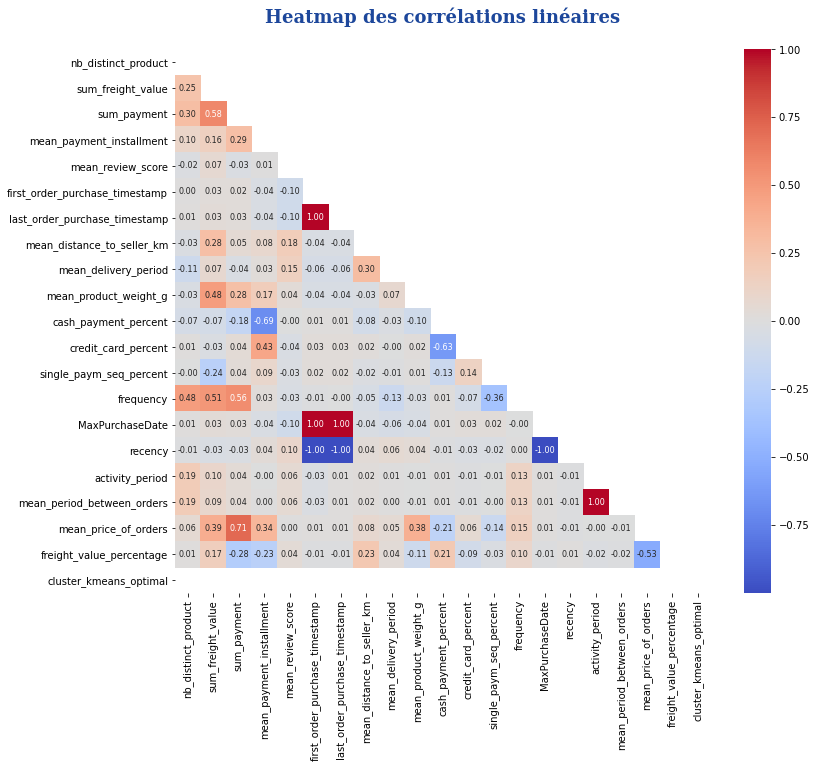

In [18]:
# Analyser les corrélations linéaires entre les variables dans le cluster_insatisfait

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
corr = cluster_insatisfait.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

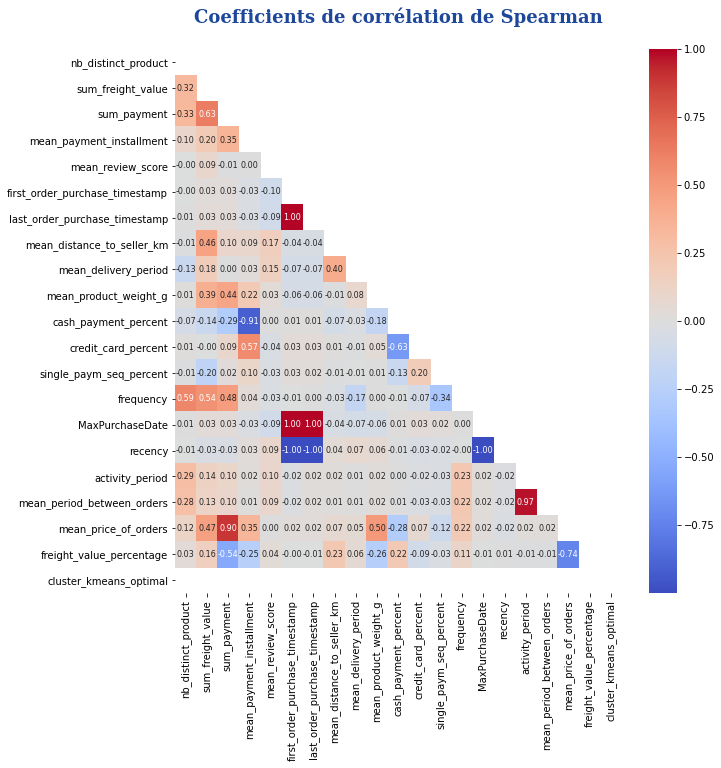

In [19]:
matrice_corr2 = cluster_insatisfait.corr(method='spearman')
mask = np.zeros_like(matrice_corr2)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(matrice_corr2, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Coefficients de corrélation de Spearman\n", 
          fontdict=font_title)
plt.show()

In [20]:
# on voit qu'il existe une faible relation entre mean_review_score et les deux
# variables mean_delivey_period et mean_distance_to_seller_km
# aucune relation linéaire entre mean_review_score et les autres variables

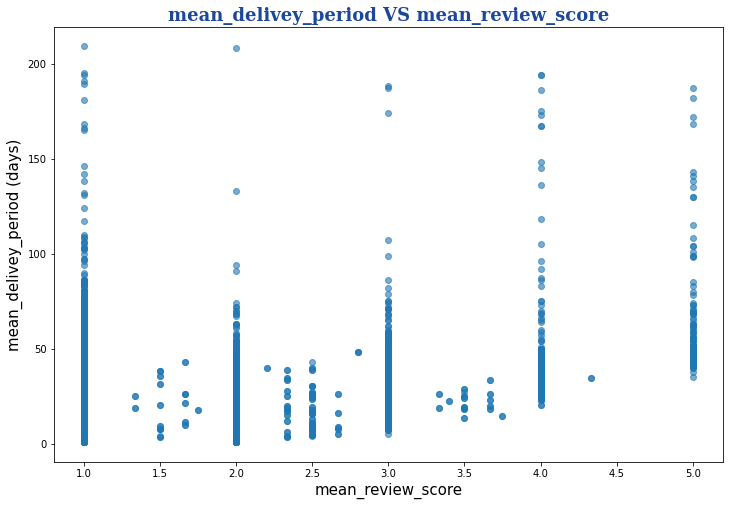

In [21]:
# Visualisation graphique 
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
X_plot = [cluster_insatisfait.loc[:,'mean_review_score'].min(), cluster_insatisfait.loc[:,'mean_review_score'].max()]
fig = plt.figure(figsize=(12,8))
plt.scatter(cluster_insatisfait.loc[:,'mean_review_score'], cluster_insatisfait.loc[:,'mean_delivery_period'], alpha=.6)
plt.xlabel("mean_review_score",fontsize=15)
plt.ylabel("mean_delivey_period (days)", fontsize=15)
plt.title("mean_delivey_period VS mean_review_score", fontdict=font_title, fontsize=18)
plt.show()

In [10]:
# Maitenant on va regarder la relation entre frequency  et les gatégories et saisons et d'autres variables

In [11]:
# On va encoder les variables catégorielles order_seasons et product_main_categories

In [12]:
# pour convertir une liste de valeurs en dictionnaire de frequence  
import re
def list_to_dict_freq(list):
    dictionnary = {}
    list = re.sub("\'|\[|\]","",list)
    for item in list.split(", "):
        
        if item not in dictionnary.keys():
            dictionnary[item] = 1
        else:
            dictionnary[item] += 1
    return dictionnary

In [13]:
# Encodage fréquentiel

def encoding_freq(feature, prefix):
    def frequency_encoding_from_dict(dictionnary):
        frequencies = pd.Series() 
        total_frequency = sum(dictionnary.values())
        for key, value in dictionnary.items():
            frequencies[prefix + key] = value / total_frequency
        return frequencies
    customer[feature] = customer[feature].apply(list_to_dict_freq)
    # encodage
    df_frequency = customer[feature]\
        .apply(frequency_encoding_from_dict).fillna(0)
    return df_frequency

# Maintenant transformer les modalités de 
# order_seasons et product_main_categories en variables 
dic_freq = {
    'order_seasons': 'season_',
    'product_main_categories': 'cat_',
}

for feature, prefix in dic_freq.items():
    df_frequency = encoding_freq(feature, prefix)
    customer = pd.concat(
        [customer, df_frequency],
        sort=False,
        axis=1
    )

<ipython-input-13-10d49e41ac0e>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  frequencies = pd.Series()


In [14]:
customer_freq_cat_season = customer[['frequency','nb_distinct_product', 'sum_freight_value', 'sum_payment',
                                     'single_paym_seq_percent',
                                     'season_spring', 'season_winter', 'season_summer',
                                     'season_automn', 'cat_furniture', 'cat_home', 'cat_electronics',
                                     'cat_sports_leisure', 'cat_supplies', 'cat_health_beauty', 
                                     'cat_construction', 'cat_misc', 'cat_gifts', 'cat_fashion', 
                                     'cat_food_drink', 'cat_kitchen_laptops_and_food_preparators', 'cat_pc_gamer']]

In [19]:
customer_by_freq = customer_freq_cat_season.groupby(['frequency']).sum()
customer_by_freq

,nb_distinct_product,sum_freight_value,sum_payment,single_paym_seq_percent,season_spring,season_winter,season_summer,season_automn,cat_furniture,cat_home,cat_electronics,cat_sports_leisure,cat_supplies,cat_health_beauty,cat_construction,cat_misc,cat_gifts,cat_fashion,cat_food_drink,cat_kitchen_laptops_and_food_preparators,cat_pc_gamer
frequency,,,,,,,,,,,,,,,,,,,,,
1,78076,1593286.12,1.181285e+07,78011.000000,23248.000000,20465.000000,20282.000000,14081.000000,12815.000000,9181.000000,12240.000000,11663.000000,6232.000000,12421.000000,4085.000000,2016.000000,4801.000000,1844.000000,762.000000,12.0,4.000000
2,17107,458278.96,4.008333e+06,10965.500000,3569.500000,3229.500000,2959.000000,2172.000000,3001.500000,1277.000000,1669.500000,1626.500000,734.500000,1540.500000,821.000000,331.000000,473.500000,332.000000,120.000000,1.0,2.000000
3,4702,143070.00,1.565275e+06,2345.000000,724.666667,678.333333,641.333333,514.666667,790.666667,286.000000,302.000000,326.000000,125.000000,254.333333,189.000000,68.333333,102.333333,82.666667,32.000000,0.0,0.666667
4,2237,87286.37,1.069996e+06,979.500000,339.750000,290.500000,293.750000,231.000000,362.750000,143.000000,116.750000,125.750000,73.250000,124.000000,76.500000,32.500000,39.000000,42.250000,19.250000,0.0,0.000000
5,1070,42241.05,6.237105e+05,406.600000,123.800000,130.400000,112.200000,90.600000,160.600000,44.000000,49.800000,35.200000,14.800000,47.400000,47.400000,13.000000,22.000000,14.400000,8.400000,0.0,0.000000
6,622,38645.85,6.473339e+05,263.500000,102.833333,98.500000,77.000000,49.666667,111.333333,44.000000,40.833333,26.666667,9.833333,27.833333,31.333333,11.000000,9.000000,13.333333,2.833333,0.0,0.000000
7,397,18219.43,2.309969e+05,98.428571,40.428571,36.428571,28.714286,21.428571,42.571429,16.571429,9.857143,13.428571,5.142857,12.857143,12.142857,3.714286,0.857143,8.428571,1.428571,0.0,0.000000
8,124,9410.55,2.351764e+05,41.250000,22.250000,8.625000,17.125000,11.000000,20.000000,7.625000,9.875000,2.500000,2.500000,2.875000,3.250000,1.000000,6.250000,1.125000,2.000000,0.0,0.000000
9,163,8181.24,1.012793e+05,38.888889,14.444444,10.666667,10.555556,12.333333,17.222222,8.444444,3.222222,2.666667,1.333333,0.555556,8.888889,0.000000,0.555556,4.000000,1.111111,0.0,0.000000


In [16]:
customer_freq_cat_season.shape

(94929, 22)

In [20]:
customer_by_freq.iloc[0,9:22]

cat_home                                     9181.0
cat_electronics                             12240.0
cat_sports_leisure                          11663.0
cat_supplies                                 6232.0
cat_health_beauty                           12421.0
cat_construction                             4085.0
cat_misc                                     2016.0
cat_gifts                                    4801.0
cat_fashion                                  1844.0
cat_food_drink                                762.0
cat_kitchen_laptops_and_food_preparators       12.0
cat_pc_gamer                                    4.0
Name: 1, dtype: float64

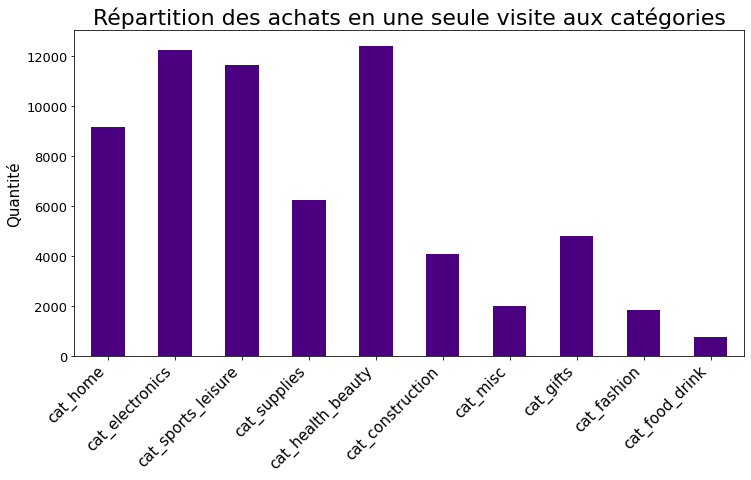

In [27]:
ax = customer_by_freq.iloc[0,9:19].plot(kind='bar', figsize=(12,6), color="indigo", fontsize=13);
ax.set_alpha(0.8)
plt.xticks(rotation='45', horizontalalignment="right", fontsize=15)
ax.set_title("Répartition des achats en une seule visite aux catégories", fontsize=22)
ax.set_ylabel("Quantité", fontsize=15);
plt.show()

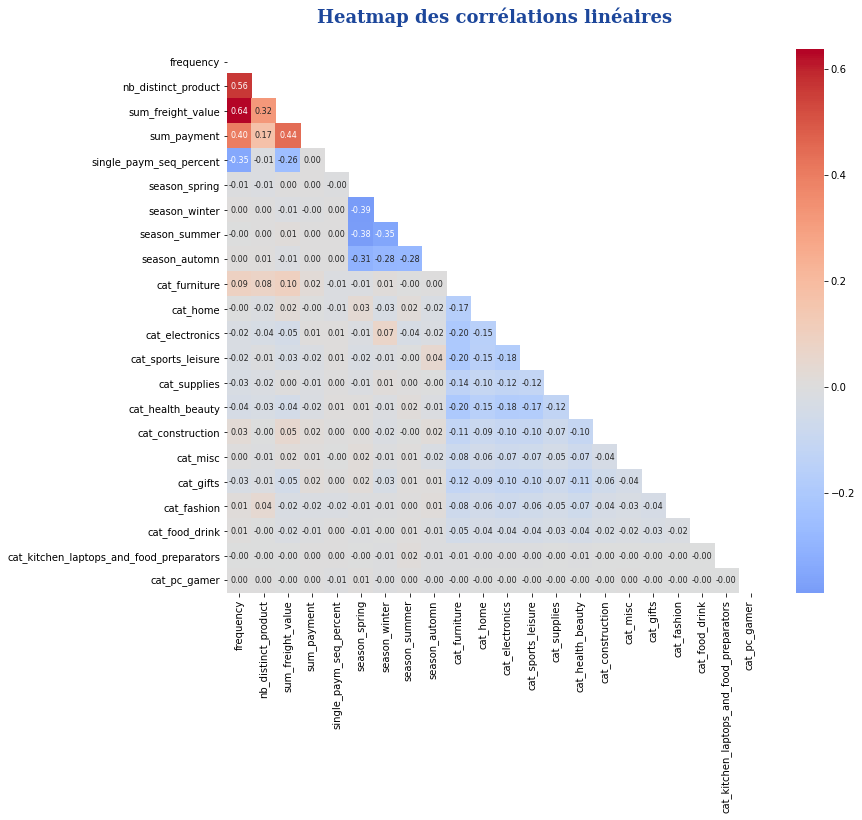

In [149]:
# Analyser les corrélations linéaires entre les variables

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
corr = customer_freq_cat_season.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

In [150]:
# on voit qu'il y a une relation linéaire entre la variable 
# 'frequency' et les 4 variables : 'nb_distinct_product', 'sum_freight_value',
# 'sum_payment', 'single_paym_seq_percent',

In [22]:
# on va Évaluer les performances du modèle selectionné :

In [23]:
# Question : Pouvons-nous prédire la classe du client compte tenu de ses données 
# et les classer le plus rapidement possible ?

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [25]:
customer_seg_df = customer[['customer_unique_id', 'sum_payment', 'mean_review_score',
                             'mean_delivery_period','nb_distinct_product','frequency',
                             'recency', 'mean_period_between_orders', 'mean_price_of_orders', 'cluster_kmeans_optimal']]

In [53]:
from sklearn.preprocessing import LabelEncoder
X = customer_seg_df.drop(['cluster_kmeans_optimal', 'customer_unique_id'], axis=1)
y = customer_seg_df[['cluster_kmeans_optimal']]
label_encoder=LabelEncoder()
y = LabelEncoder().fit_transform(y.values.ravel())

In [ ]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

In [54]:
# séparer nos données entre données d'entrainement et données de test
#X, y = make_classification(n_features = 8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [55]:
y_train

array([0, 2, 2, ..., 0, 3, 0], dtype=int64)

In [60]:
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
print(accuracy_score(y_test, pred_lr)) 

0.9977527300818146


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
svc = SVC()
model_svc = svc.fit(X_train, y_train)
pred = model_svc.predict(X_test)
print(accuracy_score(y_test, pred))

0.997120685417325


In [62]:
rfc = RandomForestClassifier()
model_rfc = rfc.fit(X_train, y_train)
pred = model_rfc.predict(X_test)
print(accuracy_score(y_test, pred))

0.9976473893043998


In [63]:
gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(X_train, y_train)
pred = model_gbc.predict(X_test)
print(accuracy_score(y_test, pred))

0.9963130727904772


In [64]:
from sklearn.tree import DecisionTreeClassifier
dtrc = DecisionTreeClassifier()
model_dtrc = dtrc.fit(X_train, y_train)
pred = model_dtrc.predict(X_test)
print(accuracy_score(y_test, pred))

0.9956810281259876


In [68]:
vc2 = VotingClassifier(estimators=[('rf', rfc), ('gbc', gbc), ('svc', svc), ('lr', lr),('dtrc', dtrc)], voting='hard')
model_vc2 = vc2.fit(X_train, y_train)
pred = model_vc2.predict(X_test)
print(accuracy_score(y_test, pred))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9975771621194565


In [367]:
# accuracy_score est élevé dû au bon modèle selectionné pour la segmentation

In [368]:
# Le but est également d'essayer 
# de classer les clients le plus rapidement possible.
# Nous allons donc essayer d'observer la qualité de notre classification 
# au cours du temps et comparer les différents algorithmes sur ce critère

In [369]:
# Classification au cours du temps

In [69]:
# Selectionner les variables
customer_seg_df = customer[['customer_unique_id', 'sum_payment', 'mean_review_score',
                             'mean_delivery_period','nb_distinct_product','frequency',
                             'recency', 'mean_period_between_orders', 'mean_price_of_orders',
                            'cluster_kmeans_optimal', 'first_order_purchase_timestamp', 'last_order_purchase_timestamp']]

In [70]:
customer_seg_df.loc[:,'first_order_purchase_timestamp'] = pd.to_datetime(customer_seg_df.loc[:,'first_order_purchase_timestamp'])
#customer_seg_df['first_order_purchase_timestamp'] = customer_seg_df['first_order_purchase_timestamp'].dt.datetime
customer_seg_df.loc[:,'last_order_purchase_timestamp'] = pd.to_datetime(customer_seg_df.loc[:,'last_order_purchase_timestamp'])
#customer_seg_df['last_order_purchase_timestamp'] = customer_seg_df['last_order_purchase_timestamp'].dt.datetime

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [372]:
customer_seg_df.first_order_purchase_timestamp.min()

Timestamp('2016-10-03 09:44:50')

In [373]:
customer_seg_df.last_order_purchase_timestamp.max()

Timestamp('2018-08-29 15:00:37')

In [74]:
import datetime as dt
date_limit = customer_seg_df.first_order_purchase_timestamp.min()
confusion_matrixes = []
accuracy_score_list = []
index = []
while date_limit <  customer_seg_df.first_order_purchase_timestamp.max():
    
    X_test =  customer_seg_df[customer_seg_df.first_order_purchase_timestamp <= date_limit] 
    y_test=X_test.cluster_kmeans_optimal
    X_test=X_test.drop(['first_order_purchase_timestamp', 'last_order_purchase_timestamp', 'customer_unique_id', "cluster_kmeans_optimal"], 1)
    sc_X = StandardScaler()
    X_test = sc_X.fit_transform(X_test)
    pred_dtrc = model_dtrc.predict(X_test)
    pred_vc2 = model_vc2.predict(X_test)
    print("kkkkkkkkkkkkkkkkkkkk")
    print(y_test)
    print("ppppppppp")
    print(pred_vc2)
    #pred_ngb = model_ngb.predict(X_test)
    pred_lr = model_lr.predict(X_test)
    pred_rfc = model_rfc.predict(X_test)
    #pred_svc = model_svc.predict(X_test)
    
    c = confusion_matrix(y_test, pred_vc2)
    #d = confusion_matrix(y_test, pred_lr)
    
    index.append(30+(date_limit - customer_seg_df.first_order_purchase_timestamp.min()).days)
    
    confusion_matrixes.append(c)
    
    accuracy_score_list.append([accuracy_score(y_test, pred_vc2),
                           accuracy_score(y_test, pred_lr),
                           accuracy_score(y_test, pred_rfc),
                           accuracy_score(y_test, pred_dtrc)])
    date_limit = date_limit + dt.timedelta(days = 3)

kkkkkkkkkkkkkkkkkkkk
11246    3
11247    3
11248    3
Name: cluster_kmeans_optimal, dtype: int64
ppppppppp
[0 0 0]
kkkkkkkkkkkkkkkkkkkk
511      3
512      3
1941     0
2193     0
4461     0
5045     0
5828     0
7200     2
7502     2
7573     0
7901     2
8872     2
10649    0
11246    3
11247    3
11248    3
12882    0
13766    0
14652    0
17066    2
17730    0
18232    2
18857    2
19291    2
19412    0
19514    0
19600    0
20001    3
20002    3
20095    0
20523    0
22019    2
22521    3
23840    0
24233    2
25175    0
25777    2
26658    2
26723    2
26836    2
28276    0
29021    0
29188    0
29538    0
32228    2
33668    0
36454    2
36984    2
37139    0
37609    0
38385    0
40997    0
41837    2
43127    2
46226    0
46532    2
47486    0
48990    1
50564    2
50822    2
52191    0
52819    2
53273    0
53924    2
54330    0
55298    2
55334    0
55600    0
58005    2
58151    2
60585    0
61316    3
61317    3
64303    2
64969    0
66837    0
67363    2
68943    3
71279 

kkkkkkkkkkkkkkkkkkkk
365      0
397      0
511      3
512      3
779      2
951      0
1941     0
2107     3
2108     3
2193     0
2538     2
2539     2
2810     0
2990     0
3868     0
3983     0
4202     2
4356     2
4461     0
4962     0
5015     0
5016     0
5045     0
5817     2
5828     0
5904     0
6189     2
6237     0
6886     2
7200     2
7466     0
7502     2
7573     0
7901     2
8832     3
8833     3
8872     2
8992     0
9405     0
9631     0
9735     0
9784     2
10649    0
11246    3
11247    3
11248    3
11452    0
12882    0
13190    0
13766    0
14187    0
14652    0
15301    0
15476    2
15796    0
16026    0
16280    2
16518    0
16547    2
16629    2
17066    2
17263    2
17334    2
17560    2
17730    0
18232    2
18567    2
18857    2
19291    2
19412    0
19514    0
19600    0
20001    3
20002    3
20095    0
20379    2
20523    0
20530    2
21177    0
21743    0
21777    2
22019    2
22521    3
22597    0
22779    2
23417    0
23566    2
23677    0
23840    0


kkkkkkkkkkkkkkkkkkkk
365      0
397      0
511      3
512      3
779      2
951      0
1941     0
2107     3
2108     3
2193     0
2538     2
2539     2
2810     0
2990     0
3868     0
3983     0
4202     2
4356     2
4461     0
4962     0
5015     0
5016     0
5045     0
5817     2
5828     0
5904     0
6189     2
6237     0
6886     2
7200     2
7466     0
7502     2
7573     0
7901     2
8832     3
8833     3
8872     2
8992     0
9405     0
9631     0
9735     0
9784     2
10649    0
11246    3
11247    3
11248    3
11452    0
12882    0
13190    0
13766    0
14187    0
14652    0
15301    0
15476    2
15796    0
16026    0
16280    2
16518    0
16547    2
16629    2
17066    2
17263    2
17334    2
17560    2
17730    0
18232    2
18567    2
18857    2
19291    2
19412    0
19514    0
19600    0
20001    3
20002    3
20095    0
20379    2
20523    0
20530    2
21177    0
21743    0
21777    2
22019    2
22521    3
22597    0
22779    2
23417    0
23566    2
23677    0
23840    0


kkkkkkkkkkkkkkkkkkkk
365      0
397      0
511      3
512      3
779      2
951      0
1941     0
2107     3
2108     3
2193     0
2538     2
2539     2
2810     0
2990     0
3868     0
3983     0
4202     2
4356     2
4461     0
4962     0
5015     0
5016     0
5045     0
5817     2
5828     0
5904     0
6189     2
6237     0
6886     2
7200     2
7466     0
7502     2
7573     0
7901     2
8832     3
8833     3
8872     2
8992     0
9405     0
9631     0
9735     0
9784     2
10649    0
11246    3
11247    3
11248    3
11452    0
12882    0
13190    0
13766    0
14187    0
14652    0
15301    0
15476    2
15796    0
16026    0
16280    2
16518    0
16547    2
16629    2
17066    2
17263    2
17334    2
17560    2
17730    0
18232    2
18567    2
18857    2
19291    2
19412    0
19514    0
19600    0
20001    3
20002    3
20095    0
20379    2
20523    0
20530    2
21177    0
21743    0
21777    2
22019    2
22521    3
22597    0
22779    2
23417    0
23566    2
23677    0
23840    0


kkkkkkkkkkkkkkkkkkkk
365      0
397      0
511      3
512      3
779      2
951      0
1941     0
2107     3
2108     3
2193     0
2538     2
2539     2
2810     0
2990     0
3868     0
3983     0
4202     2
4356     2
4461     0
4962     0
5015     0
5016     0
5045     0
5817     2
5828     0
5904     0
6189     2
6237     0
6886     2
7200     2
7466     0
7502     2
7573     0
7901     2
8832     3
8833     3
8872     2
8992     0
9405     0
9631     0
9735     0
9784     2
10649    0
11246    3
11247    3
11248    3
11452    0
12882    0
13190    0
13766    0
14187    0
14652    0
15301    0
15476    2
15796    0
16026    0
16280    2
16518    0
16547    2
16629    2
17066    2
17263    2
17334    2
17560    2
17730    0
18232    2
18567    2
18857    2
19291    2
19412    0
19514    0
19600    0
20001    3
20002    3
20095    0
20379    2
20523    0
20530    2
21177    0
21743    0
21777    2
22019    2
22521    3
22597    0
22779    2
23417    0
23566    2
23677    0
23840    0


kkkkkkkkkkkkkkkkkkkk
365      0
397      0
511      3
512      3
779      2
951      0
1941     0
2107     3
2108     3
2193     0
2538     2
2539     2
2810     0
2990     0
3868     0
3983     0
4202     2
4356     2
4461     0
4962     0
5015     0
5016     0
5045     0
5817     2
5828     0
5904     0
6189     2
6237     0
6886     2
7200     2
7466     0
7502     2
7573     0
7901     2
8832     3
8833     3
8872     2
8992     0
9405     0
9631     0
9735     0
9784     2
10649    0
11246    3
11247    3
11248    3
11452    0
12882    0
13190    0
13766    0
14187    0
14652    0
15301    0
15476    2
15796    0
16026    0
16280    2
16518    0
16547    2
16629    2
17066    2
17263    2
17334    2
17560    2
17730    0
18232    2
18567    2
18857    2
19291    2
19412    0
19514    0
19600    0
20001    3
20002    3
20095    0
20379    2
20523    0
20530    2
21177    0
21743    0
21777    2
22019    2
22521    3
22597    0
22779    2
23417    0
23566    2
23677    0
23840    0


kkkkkkkkkkkkkkkkkkkk
365      0
397      0
511      3
512      3
779      2
951      0
1941     0
2107     3
2108     3
2193     0
2538     2
2539     2
2810     0
2990     0
3868     0
3983     0
4202     2
4356     2
4461     0
4962     0
5015     0
5016     0
5045     0
5817     2
5828     0
5904     0
6189     2
6237     0
6886     2
7200     2
7466     0
7502     2
7573     0
7901     2
8832     3
8833     3
8872     2
8992     0
9405     0
9631     0
9735     0
9784     2
10649    0
11246    3
11247    3
11248    3
11452    0
12882    0
13190    0
13766    0
14187    0
14652    0
15301    0
15476    2
15796    0
16026    0
16280    2
16518    0
16547    2
16629    2
17066    2
17263    2
17334    2
17560    2
17730    0
18232    2
18567    2
18857    2
19291    2
19412    0
19514    0
19600    0
20001    3
20002    3
20095    0
20379    2
20523    0
20530    2
21177    0
21743    0
21777    2
22019    2
22521    3
22597    0
22779    2
23417    0
23566    2
23677    0
23840    0


kkkkkkkkkkkkkkkkkkkk
365      0
397      0
511      3
512      3
779      2
951      0
1941     0
2107     3
2108     3
2193     0
2538     2
2539     2
2810     0
2990     0
3868     0
3983     0
4202     2
4356     2
4461     0
4962     0
5015     0
5016     0
5045     0
5817     2
5828     0
5904     0
6189     2
6237     0
6886     2
7200     2
7466     0
7502     2
7573     0
7901     2
8832     3
8833     3
8872     2
8992     0
9405     0
9631     0
9735     0
9784     2
10649    0
11246    3
11247    3
11248    3
11452    0
12882    0
13190    0
13766    0
14187    0
14652    0
15301    0
15476    2
15796    0
16026    0
16280    2
16518    0
16547    2
16629    2
17066    2
17263    2
17334    2
17560    2
17730    0
18232    2
18567    2
18857    2
19201    0
19202    0
19291    2
19412    0
19514    0
19600    0
20001    3
20002    3
20095    0
20379    2
20523    0
20530    2
21177    0
21743    0
21777    2
22019    2
22521    3
22597    0
22779    2
23417    0
23566    2


kkkkkkkkkkkkkkkkkkkk
365      0
397      0
511      3
512      3
779      2
951      0
1941     0
2065     3
2066     3
2067     3
2107     3
2108     3
2193     0
2538     2
2539     2
2810     0
2990     0
3868     0
3983     0
4202     2
4356     2
4461     0
4962     0
5015     0
5016     0
5045     0
5209     0
5817     2
5828     0
5904     0
6189     2
6237     0
6886     2
7200     2
7450     0
7466     0
7502     2
7573     0
7901     2
8785     0
8832     3
8833     3
8872     2
8992     0
9405     0
9631     0
9714     0
9735     0
9784     2
10396    2
10649    0
11246    3
11247    3
11248    3
11452    0
12882    0
13190    0
13766    0
14187    0
14652    0
14917    0
15301    0
15476    2
15796    0
16026    0
16280    2
16449    0
16518    0
16547    2
16629    2
17066    2
17263    2
17334    2
17356    0
17560    2
17730    0
18232    2
18567    2
18798    0
18799    0
18857    2
19201    0
19202    0
19291    2
19412    0
19514    0
19600    0
20001    3
20002    3


kkkkkkkkkkkkkkkkkkkk
365      0
397      0
511      3
512      3
779      2
951      0
1416     0
1622     0
1941     0
2065     3
2066     3
2067     3
2107     3
2108     3
2193     0
2538     2
2539     2
2810     0
2990     0
3868     0
3983     0
4130     0
4202     2
4356     2
4461     0
4962     0
5015     0
5016     0
5045     0
5209     0
5263     2
5817     2
5828     0
5904     0
6047     0
6189     2
6237     0
6525     2
6886     2
7200     2
7450     0
7466     0
7502     2
7573     0
7901     2
8258     0
8353     0
8573     0
8785     0
8832     3
8833     3
8872     2
8992     0
9185     2
9405     0
9631     0
9714     0
9735     0
9784     2
10396    2
10649    0
11246    3
11247    3
11248    3
11452    0
12871    0
12882    0
13190    0
13766    0
14187    0
14652    0
14917    0
15065    0
15301    0
15476    2
15796    0
15819    0
16009    0
16026    0
16280    2
16449    0
16518    0
16547    2
16629    2
16940    3
16941    3
17002    0
17066    2
17263    2


kkkkkkkkkkkkkkkkkkkk
365      0
397      0
511      3
512      3
746      3
747      3
779      2
951      0
1066     0
1157     0
1416     0
1622     0
1941     0
2065     3
2066     3
2067     3
2107     3
2108     3
2193     0
2538     2
2539     2
2770     0
2810     0
2941     0
2990     0
3231     0
3868     0
3947     0
3983     0
4130     0
4202     2
4253     0
4356     2
4461     0
4962     0
5015     0
5016     0
5045     0
5079     0
5209     0
5263     2
5455     2
5801     0
5814     2
5817     2
5828     0
5904     0
6047     0
6186     0
6189     2
6237     0
6418     0
6525     2
6568     2
6569     2
6886     2
6974     0
7026     0
7200     2
7222     3
7223     3
7450     0
7466     0
7492     0
7493     0
7502     2
7511     2
7512     2
7573     0
7901     2
7908     2
8202     0
8258     0
8353     0
8573     0
8785     0
8832     3
8833     3
8862     2
8872     2
8992     0
9185     2
9405     0
9464     0
9631     0
9714     0
9735     0
9784     2
10396    2


kkkkkkkkkkkkkkkkkkkk
52       0
365      0
397      0
511      3
512      3
746      3
747      3
779      2
951      0
1066     0
1157     0
1416     0
1622     0
1941     0
2065     3
2066     3
2067     3
2107     3
2108     3
2193     0
2411     0
2538     2
2539     2
2770     0
2810     0
2873     0
2941     0
2990     0
3111     0
3231     0
3868     0
3947     0
3983     0
4130     0
4202     2
4253     0
4321     0
4356     2
4461     0
4962     0
5015     0
5016     0
5045     0
5079     0
5134     0
5209     0
5263     2
5455     2
5801     0
5814     2
5817     2
5828     0
5904     0
6047     0
6186     0
6188     0
6189     2
6237     0
6418     0
6525     2
6568     2
6569     2
6886     2
6974     0
7026     0
7200     2
7222     3
7223     3
7383     2
7450     0
7466     0
7492     0
7493     0
7502     2
7511     2
7512     2
7573     0
7901     2
7908     2
8125     0
8202     0
8258     0
8353     0
8477     3
8478     3
8479     3
8573     0
8785     0
8819     0


kkkkkkkkkkkkkkkkkkkk
52       0
365      0
381      2
397      0
511      3
512      3
746      3
747      3
779      2
951      0
1066     0
1157     0
1416     0
1622     0
1932     0
1941     0
2065     3
2066     3
2067     3
2107     3
2108     3
2193     0
2281     0
2411     0
2538     2
2539     2
2770     0
2810     0
2873     0
2941     0
2990     0
3111     0
3231     0
3431     0
3868     0
3947     0
3983     0
4130     0
4202     2
4253     0
4321     0
4356     2
4461     0
4962     0
5015     0
5016     0
5045     0
5079     0
5134     0
5209     0
5263     2
5455     2
5801     0
5814     2
5817     2
5828     0
5904     0
6047     0
6186     0
6188     0
6189     2
6237     0
6418     0
6525     2
6568     2
6569     2
6750     0
6886     2
6974     0
7026     0
7197     1
7200     2
7222     3
7223     3
7226     0
7383     2
7450     0
7466     0
7492     0
7493     0
7502     2
7511     2
7512     2
7573     0
7901     2
7908     2
8125     0
8202     0
8258     0


kkkkkkkkkkkkkkkkkkkk
52       0
207      0
365      0
381      2
397      0
430      0
496      0
511      3
512      3
746      3
747      3
779      2
951      0
1066     0
1157     0
1201     0
1208     0
1416     0
1467     0
1622     0
1932     0
1941     0
2065     3
2066     3
2067     3
2107     3
2108     3
2132     1
2193     0
2281     0
2411     0
2538     2
2539     2
2589     0
2770     0
2810     0
2873     0
2941     0
2990     0
3111     0
3231     0
3431     0
3433     0
3537     0
3868     0
3947     0
3983     0
3999     0
4130     0
4202     2
4253     0
4321     0
4356     2
4461     0
4876     0
4962     0
5015     0
5016     0
5045     0
5079     0
5120     0
5134     0
5209     0
5263     2
5455     2
5801     0
5814     2
5817     2
5828     0
5904     0
6047     0
6186     0
6188     0
6189     2
6237     0
6318     2
6418     0
6476     0
6525     2
6568     2
6569     2
6579     0
6750     0
6886     2
6974     0
7026     0
7197     1
7200     2
7222     3


kkkkkkkkkkkkkkkkkkkk
52       0
207      0
365      0
381      2
397      0
430      0
496      0
511      3
512      3
746      3
747      3
779      2
951      0
1066     0
1157     0
1201     0
1208     0
1367     0
1416     0
1467     0
1622     0
1764     3
1765     3
1766     3
1787     0
1932     0
1941     0
2065     3
2066     3
2067     3
2107     3
2108     3
2132     1
2193     0
2281     0
2411     0
2538     2
2539     2
2589     0
2770     0
2810     0
2864     0
2873     0
2941     0
2990     0
3111     0
3231     0
3431     0
3433     0
3537     0
3832     2
3868     0
3947     0
3983     0
3999     0
4130     0
4202     2
4253     0
4321     0
4356     2
4461     0
4761     0
4876     0
4877     0
4962     0
5015     0
5016     0
5045     0
5079     0
5120     0
5134     0
5209     0
5263     2
5339     0
5455     2
5751     0
5801     0
5814     2
5817     2
5828     0
5856     0
5868     2
5904     0
5998     0
6047     0
6186     0
6188     0
6189     2
6237     0


kkkkkkkkkkkkkkkkkkkk
52       0
112      0
122      2
207      0
365      0
381      2
390      3
391      3
397      0
430      0
496      0
511      3
512      3
746      3
747      3
779      2
916      0
951      0
1012     0
1066     0
1099     0
1157     0
1201     0
1208     0
1283     0
1367     0
1416     0
1456     2
1467     0
1622     0
1764     3
1765     3
1766     3
1787     0
1932     0
1941     0
1992     0
2065     3
2066     3
2067     3
2107     3
2108     3
2132     1
2193     0
2281     0
2411     0
2531     0
2533     0
2538     2
2539     2
2589     0
2741     0
2770     0
2810     0
2864     0
2873     0
2941     0
2990     0
3111     0
3231     0
3362     0
3431     0
3433     0
3537     0
3832     2
3868     0
3947     0
3983     0
3999     0
4024     2
4041     2
4047     0
4130     0
4152     0
4202     2
4215     0
4253     0
4321     0
4356     2
4461     0
4761     0
4876     0
4877     0
4962     0
5015     0
5016     0
5045     0
5079     0
5120     0


kkkkkkkkkkkkkkkkkkkk
52       0
112      0
122      2
168      0
207      0
365      0
381      2
390      3
391      3
397      0
430      0
432      0
496      0
511      3
512      3
583      3
584      3
746      3
747      3
779      2
916      0
951      0
1012     0
1066     0
1099     0
1157     0
1201     0
1208     0
1283     0
1367     0
1416     0
1456     2
1467     0
1622     0
1764     3
1765     3
1766     3
1787     0
1932     0
1941     0
1992     0
2011     2
2065     3
2066     3
2067     3
2107     3
2108     3
2132     1
2193     0
2281     0
2411     0
2531     0
2533     0
2538     2
2539     2
2589     0
2741     0
2763     0
2770     0
2810     0
2864     0
2873     0
2941     0
2990     0
3111     0
3231     0
3362     0
3431     0
3433     0
3537     0
3832     2
3868     0
3947     0
3983     0
3999     0
4024     2
4041     2
4047     0
4130     0
4152     0
4202     2
4215     0
4253     0
4321     0
4356     2
4461     0
4761     0
4876     0
4877     0


kkkkkkkkkkkkkkkkkkkk
52       0
112      0
122      2
132      0
151      0
168      0
207      0
365      0
381      2
390      3
391      3
397      0
430      0
432      0
461      0
496      0
511      3
512      3
583      3
584      3
746      3
747      3
779      2
916      0
951      0
1012     0
1066     0
1099     0
1157     0
1201     0
1208     0
1283     0
1367     0
1413     2
1416     0
1456     2
1467     0
1622     0
1764     3
1765     3
1766     3
1787     0
1903     0
1932     0
1941     0
1992     0
2011     2
2065     3
2066     3
2067     3
2107     3
2108     3
2132     1
2193     0
2281     0
2411     0
2531     0
2533     0
2538     2
2539     2
2589     0
2741     0
2763     0
2770     0
2810     0
2864     0
2873     0
2941     0
2990     0
3111     0
3231     0
3362     0
3431     0
3433     0
3537     0
3573     0
3832     2
3842     0
3868     0
3947     0
3983     0
3999     0
4024     2
4041     2
4047     0
4130     0
4152     0
4202     2
4215     0


kkkkkkkkkkkkkkkkkkkk
52       0
112      0
122      2
132      0
151      0
168      0
207      0
365      0
381      2
390      3
391      3
397      0
430      0
432      0
461      0
496      0
511      3
512      3
583      3
584      3
746      3
747      3
774      2
779      2
916      0
951      0
1012     0
1046     0
1066     0
1099     0
1157     0
1201     0
1208     0
1224     3
1283     0
1367     0
1413     2
1416     0
1456     2
1467     0
1622     0
1690     0
1731     0
1764     3
1765     3
1766     3
1787     0
1903     0
1932     0
1941     0
1992     0
2011     2
2065     3
2066     3
2067     3
2107     3
2108     3
2132     1
2193     0
2281     0
2411     0
2531     0
2533     0
2538     2
2539     2
2589     0
2741     0
2763     0
2770     0
2800     2
2810     0
2864     0
2873     0
2941     0
2952     0
2990     0
3111     0
3231     0
3362     0
3388     0
3431     0
3433     0
3537     0
3573     0
3832     2
3842     0
3868     0
3947     0
3983     0


kkkkkkkkkkkkkkkkkkkk
52       0
112      0
122      2
132      0
151      0
168      0
207      0
365      0
381      2
390      3
391      3
397      0
430      0
432      0
461      0
496      0
511      3
512      3
583      3
584      3
746      3
747      3
774      2
779      2
916      0
951      0
1012     0
1046     0
1066     0
1099     0
1157     0
1201     0
1208     0
1224     3
1251     0
1283     0
1367     0
1413     2
1416     0
1456     2
1467     0
1622     0
1690     0
1731     0
1764     3
1765     3
1766     3
1787     0
1903     0
1932     0
1941     0
1992     0
2011     2
2065     3
2066     3
2067     3
2107     3
2108     3
2132     1
2193     0
2235     2
2264     0
2281     0
2411     0
2500     0
2531     0
2533     0
2538     2
2539     2
2589     0
2612     0
2741     0
2756     0
2763     0
2770     0
2800     2
2810     0
2864     0
2873     0
2941     0
2952     0
2990     0
3111     0
3231     0
3328     0
3362     0
3388     0
3431     0
3433     0


kkkkkkkkkkkkkkkkkkkk
52       0
112      0
122      2
132      0
151      0
168      0
207      0
219      0
365      0
381      2
390      3
391      3
397      0
430      0
432      0
461      0
496      0
511      3
512      3
583      3
584      3
746      3
747      3
774      2
779      2
916      0
951      0
1012     0
1046     0
1066     0
1079     0
1099     0
1157     0
1201     0
1208     0
1224     3
1251     0
1283     0
1367     0
1413     2
1416     0
1456     2
1467     0
1622     0
1690     0
1731     0
1764     3
1765     3
1766     3
1787     0
1903     0
1932     0
1941     0
1992     0
2011     2
2065     3
2066     3
2067     3
2107     3
2108     3
2132     1
2162     2
2193     0
2235     2
2264     0
2281     0
2411     0
2500     0
2531     0
2533     0
2538     2
2539     2
2589     0
2612     0
2741     0
2756     0
2763     0
2770     0
2800     2
2810     0
2864     0
2873     0
2941     0
2952     0
2990     0
3111     0
3231     0
3328     0
3362     0


kkkkkkkkkkkkkkkkkkkk
52       0
112      0
122      2
132      0
151      0
168      0
207      0
219      0
365      0
381      2
390      3
391      3
397      0
430      0
432      0
461      0
496      0
511      3
512      3
583      3
584      3
746      3
747      3
774      2
779      2
916      0
951      0
1012     0
1046     0
1066     0
1079     0
1099     0
1157     0
1201     0
1208     0
1224     3
1251     0
1283     0
1367     0
1413     2
1416     0
1426     0
1456     2
1467     0
1622     0
1676     0
1690     0
1731     0
1764     3
1765     3
1766     3
1787     0
1903     0
1932     0
1941     0
1992     0
2011     2
2065     3
2066     3
2067     3
2107     3
2108     3
2132     1
2162     2
2193     0
2235     2
2264     0
2281     0
2411     0
2500     0
2531     0
2533     0
2538     2
2539     2
2589     0
2612     0
2741     0
2756     0
2763     0
2770     0
2800     2
2810     0
2864     0
2873     0
2941     0
2952     0
2990     0
3092     0
3111     0


kkkkkkkkkkkkkkkkkkkk
52       0
112      0
122      2
132      0
151      0
168      0
207      0
219      0
365      0
381      2
390      3
391      3
397      0
430      0
432      0
435      0
461      0
496      0
511      3
512      3
583      3
584      3
746      3
747      3
774      2
779      2
916      0
951      0
1012     0
1046     0
1066     0
1079     0
1099     0
1157     0
1201     0
1208     0
1224     3
1251     0
1283     0
1367     0
1413     2
1416     0
1426     0
1456     2
1467     0
1622     0
1676     0
1690     0
1731     0
1764     3
1765     3
1766     3
1787     0
1903     0
1932     0
1941     0
1992     0
2011     2
2065     3
2066     3
2067     3
2107     3
2108     3
2132     1
2162     2
2193     0
2197     2
2235     2
2264     0
2281     0
2411     0
2500     0
2520     0
2531     0
2533     0
2538     2
2539     2
2589     0
2612     0
2655     0
2741     0
2756     0
2763     0
2770     0
2779     0
2800     2
2810     0
2864     0
2873     0


kkkkkkkkkkkkkkkkkkkk
52       0
112      0
122      2
132      0
151      0
168      0
203      2
207      0
219      0
365      0
381      2
390      3
391      3
397      0
430      0
432      0
435      0
461      0
496      0
511      3
512      3
583      3
584      3
746      3
747      3
774      2
779      2
784      0
787      0
916      0
951      0
1012     0
1046     0
1066     0
1079     0
1099     0
1157     0
1201     0
1208     0
1224     3
1251     0
1283     0
1367     0
1413     2
1416     0
1426     0
1456     2
1467     0
1622     0
1676     0
1690     0
1731     0
1752     0
1764     3
1765     3
1766     3
1787     0
1891     0
1903     0
1932     0
1941     0
1992     0
2011     2
2065     3
2066     3
2067     3
2107     3
2108     3
2132     1
2162     2
2193     0
2197     2
2235     2
2264     0
2281     0
2411     0
2500     0
2520     0
2531     0
2533     0
2538     2
2539     2
2589     0
2612     0
2655     0
2741     0
2756     0
2763     0
2770     0


kkkkkkkkkkkkkkkkkkkk
52       0
112      0
122      2
132      0
151      0
168      0
203      2
207      0
219      0
326      0
365      0
381      2
390      3
391      3
397      0
430      0
432      0
435      0
461      0
496      0
511      3
512      3
583      3
584      3
725      0
746      3
747      3
774      2
779      2
784      0
787      0
916      0
951      0
1012     0
1046     0
1066     0
1079     0
1099     0
1157     0
1201     0
1208     0
1224     3
1251     0
1283     0
1367     0
1413     2
1416     0
1426     0
1456     2
1467     0
1622     0
1676     0
1690     0
1731     0
1752     0
1764     3
1765     3
1766     3
1787     0
1891     0
1903     0
1932     0
1941     0
1992     0
2011     2
2039     0
2065     3
2066     3
2067     3
2107     3
2108     3
2132     1
2162     2
2193     0
2197     2
2235     2
2264     0
2266     0
2281     0
2411     0
2500     0
2520     0
2531     0
2533     0
2538     2
2539     2
2589     0
2612     0
2655     0


kkkkkkkkkkkkkkkkkkkk
52       0
112      0
122      2
132      0
151      0
168      0
203      2
207      0
219      0
326      0
365      0
381      2
390      3
391      3
397      0
430      0
432      0
435      0
461      0
496      0
511      3
512      3
583      3
584      3
725      0
746      3
747      3
774      2
779      2
784      0
787      0
797      0
916      0
951      0
1012     0
1046     0
1066     0
1079     0
1099     0
1157     0
1201     0
1208     0
1224     3
1251     0
1283     0
1367     0
1413     2
1416     0
1426     0
1456     2
1467     0
1622     0
1676     0
1690     0
1731     0
1752     0
1764     3
1765     3
1766     3
1787     0
1891     0
1903     0
1932     0
1941     0
1992     0
2011     2
2039     0
2065     3
2066     3
2067     3
2099     0
2107     3
2108     3
2132     1
2162     2
2193     0
2197     2
2235     2
2264     0
2266     0
2268     0
2281     0
2411     0
2500     0
2520     0
2531     0
2533     0
2538     2
2539     2


kkkkkkkkkkkkkkkkkkkk
52       0
112      0
122      2
132      0
151      0
168      0
203      2
207      0
217      0
219      0
326      0
365      0
381      2
390      3
391      3
397      0
412      0
430      0
432      0
435      0
461      0
496      0
511      3
512      3
583      3
584      3
725      0
746      3
747      3
774      2
779      2
784      0
787      0
797      0
916      0
951      0
1012     0
1046     0
1066     0
1079     0
1099     0
1157     0
1201     0
1208     0
1224     3
1251     0
1283     0
1300     3
1301     3
1367     0
1413     2
1416     0
1426     0
1456     2
1467     0
1573     0
1622     0
1676     0
1690     0
1731     0
1752     0
1764     3
1765     3
1766     3
1787     0
1847     0
1891     0
1903     0
1932     0
1941     0
1992     0
2011     2
2039     0
2065     3
2066     3
2067     3
2099     0
2107     3
2108     3
2132     1
2162     2
2193     0
2197     2
2235     2
2264     0
2266     0
2268     0
2281     0
2411     0


kkkkkkkkkkkkkkkkkkkk
52       0
83       0
112      0
122      2
132      0
151      0
168      0
203      2
207      0
217      0
219      0
326      0
365      0
381      2
390      3
391      3
397      0
412      0
430      0
432      0
435      0
461      0
488      0
496      0
511      3
512      3
546      0
583      3
584      3
689      2
725      0
746      3
747      3
774      2
779      2
784      0
787      0
797      0
806      0
916      0
951      0
1012     0
1046     0
1066     0
1068     0
1079     0
1099     0
1157     0
1201     0
1208     0
1224     3
1251     0
1283     0
1300     3
1301     3
1367     0
1413     2
1416     0
1426     0
1456     2
1467     0
1573     0
1594     0
1622     0
1676     0
1690     0
1731     0
1752     0
1764     3
1765     3
1766     3
1787     0
1847     0
1891     0
1903     0
1932     0
1941     0
1982     0
1992     0
2011     2
2039     0
2065     3
2066     3
2067     3
2099     0
2107     3
2108     3
2132     1
2162     2


kkkkkkkkkkkkkkkkkkkk
52       0
83       0
112      0
122      2
132      0
151      0
168      0
203      2
207      0
217      0
219      0
326      0
365      0
381      2
390      3
391      3
397      0
412      0
430      0
432      0
435      0
461      0
488      0
496      0
511      3
512      3
546      0
583      3
584      3
689      2
706      0
722      0
725      0
746      3
747      3
774      2
779      2
784      0
787      0
797      0
806      0
916      0
951      0
1012     0
1046     0
1066     0
1068     0
1079     0
1099     0
1157     0
1201     0
1208     0
1224     3
1251     0
1283     0
1300     3
1301     3
1367     0
1413     2
1416     0
1426     0
1456     2
1467     0
1545     0
1573     0
1594     0
1622     0
1676     0
1690     0
1731     0
1738     0
1752     0
1764     3
1765     3
1766     3
1787     0
1847     0
1879     0
1891     0
1903     0
1932     0
1941     0
1982     0
1992     0
2011     2
2039     0
2040     2
2065     3
2066     3


kkkkkkkkkkkkkkkkkkkk
52       0
83       0
112      0
122      2
132      0
151      0
168      0
193      2
194      2
203      2
207      0
217      0
219      0
273      2
326      0
365      0
381      2
390      3
391      3
397      0
412      0
430      0
432      0
434      0
435      0
456      0
461      0
488      0
496      0
511      3
512      3
546      0
583      3
584      3
625      0
689      2
697      0
698      0
706      0
722      0
725      0
735      0
746      3
747      3
774      2
779      2
784      0
787      0
797      0
806      0
916      0
951      0
963      0
1012     0
1046     0
1066     0
1068     0
1079     0
1099     0
1156     0
1157     0
1201     0
1208     0
1224     3
1251     0
1283     0
1300     3
1301     3
1367     0
1413     2
1416     0
1426     0
1456     2
1467     0
1491     0
1545     0
1573     0
1594     0
1602     2
1622     0
1676     0
1690     0
1731     0
1738     0
1752     0
1764     3
1765     3
1766     3
1787     0


kkkkkkkkkkkkkkkkkkkk
52       0
77       0
83       0
112      0
122      2
132      0
151      0
168      0
193      2
194      2
203      2
207      0
217      0
219      0
273      2
326      0
365      0
381      2
390      3
391      3
393      0
397      0
412      0
430      0
432      0
434      0
435      0
456      0
461      0
488      0
496      0
511      3
512      3
546      0
583      3
584      3
625      0
689      2
697      0
698      0
706      0
722      0
725      0
735      0
746      3
747      3
774      2
779      2
784      0
787      0
797      0
806      0
916      0
951      0
963      0
1012     0
1046     0
1066     0
1068     0
1079     0
1099     0
1156     0
1157     0
1201     0
1208     0
1224     3
1251     0
1283     0
1300     3
1301     3
1367     0
1413     2
1416     0
1426     0
1456     2
1467     0
1491     0
1545     0
1573     0
1594     0
1602     2
1622     0
1676     0
1690     0
1731     0
1738     0
1752     0
1764     3
1765     3


kkkkkkkkkkkkkkkkkkkk
52       0
77       0
83       0
104      2
112      0
        ..
94896    0
94899    0
94908    2
94916    0
94921    2
Name: cluster_kmeans_optimal, Length: 5074, dtype: int64
ppppppppp
[0 0 0 ... 2 0 2]
kkkkkkkkkkkkkkkkkkkk
52       0
77       0
83       0
104      2
112      0
        ..
94896    0
94899    0
94908    2
94916    0
94921    2
Name: cluster_kmeans_optimal, Length: 5288, dtype: int64
ppppppppp
[0 0 0 ... 2 0 2]
kkkkkkkkkkkkkkkkkkkk
52       0
66       2
77       0
83       0
104      2
        ..
94896    0
94899    0
94908    2
94916    0
94921    2
Name: cluster_kmeans_optimal, Length: 5487, dtype: int64
ppppppppp
[0 0 0 ... 2 0 2]
kkkkkkkkkkkkkkkkkkkk
52       0
66       2
77       0
83       0
104      2
        ..
94896    0
94899    0
94908    2
94916    0
94921    2
Name: cluster_kmeans_optimal, Length: 5760, dtype: int64
ppppppppp
[0 0 0 ... 2 0 2]
kkkkkkkkkkkkkkkkkkkk
52       0
66       2
77       0
83       0
104      2
        ..
94899

kkkkkkkkkkkkkkkkkkkk
0        0
20       2
25       0
29       0
36       3
        ..
94908    2
94912    2
94916    0
94918    0
94921    2
Name: cluster_kmeans_optimal, Length: 16441, dtype: int64
ppppppppp
[0 2 0 ... 0 0 2]
kkkkkkkkkkkkkkkkkkkk
0        0
20       2
25       0
29       0
36       3
        ..
94908    2
94912    2
94916    0
94918    0
94921    2
Name: cluster_kmeans_optimal, Length: 16913, dtype: int64
ppppppppp
[0 2 0 ... 0 0 2]
kkkkkkkkkkkkkkkkkkkk
0        0
20       2
25       0
29       0
36       3
        ..
94908    2
94912    2
94916    0
94918    0
94921    2
Name: cluster_kmeans_optimal, Length: 17204, dtype: int64
ppppppppp
[0 2 0 ... 0 0 2]
kkkkkkkkkkkkkkkkkkkk
0        0
20       2
25       0
29       0
36       3
        ..
94908    2
94912    2
94916    0
94918    0
94921    2
Name: cluster_kmeans_optimal, Length: 17623, dtype: int64
ppppppppp
[0 2 0 ... 0 0 2]
kkkkkkkkkkkkkkkkkkkk
0        0
20       2
25       0
29       0
36       3
        ..
9

kkkkkkkkkkkkkkkkkkkk
0        0
5        0
6        0
13       0
20       2
        ..
94911    0
94912    2
94916    0
94918    0
94921    2
Name: cluster_kmeans_optimal, Length: 31281, dtype: int64
ppppppppp
[0 0 0 ... 0 0 2]
kkkkkkkkkkkkkkkkkkkk
0        0
5        0
6        0
13       0
20       2
        ..
94912    2
94916    0
94918    0
94921    2
94927    0
Name: cluster_kmeans_optimal, Length: 31647, dtype: int64
ppppppppp
[0 0 0 ... 0 2 0]
kkkkkkkkkkkkkkkkkkkk
0        0
5        0
6        0
13       0
20       2
        ..
94912    2
94916    0
94918    0
94921    2
94927    0
Name: cluster_kmeans_optimal, Length: 32149, dtype: int64
ppppppppp
[0 0 0 ... 0 2 0]
kkkkkkkkkkkkkkkkkkkk
0        0
5        0
6        0
13       0
20       2
        ..
94912    2
94916    0
94918    0
94921    2
94927    0
Name: cluster_kmeans_optimal, Length: 32633, dtype: int64
ppppppppp
[0 0 0 ... 0 2 0]
kkkkkkkkkkkkkkkkkkkk
0        0
5        0
6        0
13       0
20       2
        ..
9

kkkkkkkkkkkkkkkkkkkk
0        0
1        0
5        0
6        0
8        0
        ..
94918    0
94921    2
94923    2
94927    0
94928    0
Name: cluster_kmeans_optimal, Length: 54296, dtype: int64
ppppppppp
[0 0 0 ... 2 0 0]
kkkkkkkkkkkkkkkkkkkk
0        0
1        0
5        0
6        0
7        0
        ..
94918    0
94921    2
94923    2
94927    0
94928    0
Name: cluster_kmeans_optimal, Length: 55113, dtype: int64
ppppppppp
[0 0 0 ... 2 0 0]
kkkkkkkkkkkkkkkkkkkk
0        0
1        0
5        0
6        0
7        0
        ..
94918    0
94921    2
94923    2
94927    0
94928    0
Name: cluster_kmeans_optimal, Length: 55766, dtype: int64
ppppppppp
[0 0 0 ... 2 0 0]
kkkkkkkkkkkkkkkkkkkk
0        0
1        0
5        0
6        0
7        0
        ..
94918    0
94921    2
94923    2
94927    0
94928    0
Name: cluster_kmeans_optimal, Length: 56568, dtype: int64
ppppppppp
[0 0 0 ... 2 0 0]
kkkkkkkkkkkkkkkkkkkk
0        0
1        0
5        0
6        0
7        0
        ..
9

kkkkkkkkkkkkkkkkkkkk
0        0
1        0
2        0
3        0
5        0
        ..
94924    0
94925    0
94926    2
94927    0
94928    0
Name: cluster_kmeans_optimal, Length: 78001, dtype: int64
ppppppppp
[0 0 0 ... 2 0 0]
kkkkkkkkkkkkkkkkkkkk
0        0
1        0
2        0
3        0
5        0
        ..
94924    0
94925    0
94926    2
94927    0
94928    0
Name: cluster_kmeans_optimal, Length: 78558, dtype: int64
ppppppppp
[0 0 0 ... 2 0 0]
kkkkkkkkkkkkkkkkkkkk
0        0
1        0
2        0
3        0
5        0
        ..
94924    0
94925    0
94926    2
94927    0
94928    0
Name: cluster_kmeans_optimal, Length: 79298, dtype: int64
ppppppppp
[0 0 0 ... 2 0 0]
kkkkkkkkkkkkkkkkkkkk
0        0
1        0
2        0
3        0
5        0
        ..
94924    0
94925    0
94926    2
94927    0
94928    0
Name: cluster_kmeans_optimal, Length: 79895, dtype: int64
ppppppppp
[0 0 0 ... 2 0 0]
kkkkkkkkkkkkkkkkkkkk
0        0
1        0
2        0
3        0
5        0
        ..
9

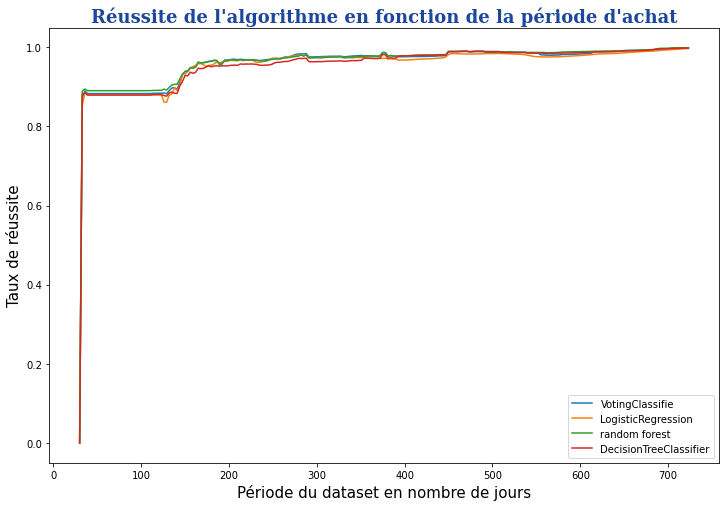

In [75]:
accuracy_score_list = np.array(accuracy_score_list).astype(float) 
labels = ['VotingClassifie', 'LogisticRegression','random forest', 'DecisionTreeClassifier']
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
# Visualisation graphique 
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
for i in range(0,4): 
    ax.plot(index, accuracy_score_list[:,i], label = labels[i],)
ax.legend()
plt.xlabel('Période du dataset en nombre de jours', fontsize=15)
plt.ylabel('Taux de réussite', fontsize=15)
plt.title("Réussite de l'algorithme en fonction de la période d'achat", fontdict=font_title, fontsize=18)
plt.axis('tight')
plt.show()

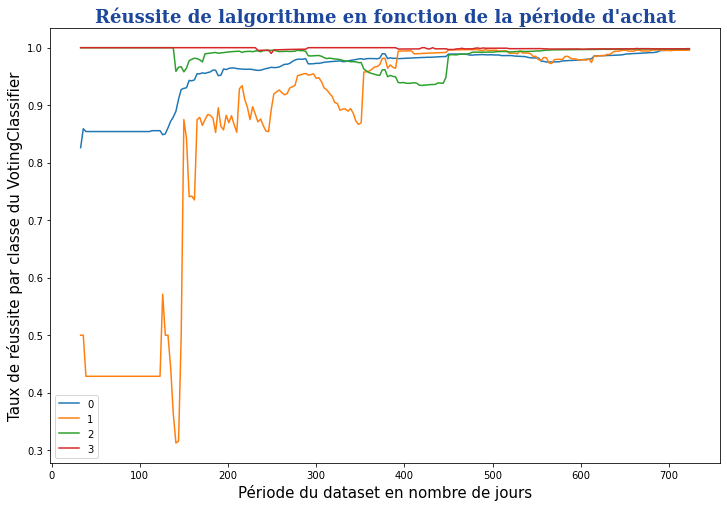

In [76]:
index.pop(0)
confusion_matrixes.pop(0)

accuracy_score_user_ = []
for i in range(0,len(index)):
    c = confusion_matrixes[i]
    accuracy_score_user_.append([c[0][0]/sum(c)[0],
                                 c[1][1]/sum(c)[1],
                                 c[2][2]/sum(c)[2],
                                 c[3][3]/sum(c)[3]])
    
accuracy_score_user_ = np.array(accuracy_score_user_).astype(float) 

labels = np.unique(clusters_labels_optimal_kmeans.cluster_kmeans_optimal)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax = plt.gca() 
for i in np.unique(clusters_labels_optimal_kmeans.cluster_kmeans_optimal): 
    ax.plot(index, accuracy_score_user_[:,i], label = labels[i])
ax.legend()
plt.xlabel('Période du dataset en nombre de jours', fontsize=15)
plt.ylabel('Taux de réussite par classe du VotingClassifier', fontsize=15)
plt.title("Réussite de l'algorithme en fonction de la période d'achat", fontdict=font_title, fontsize=18)
plt.axis('tight')
plt.show()

In [ ]:
# Maintenant on va regarder la stabilité de la segmentation au cours de temps

In [76]:
def initialisation_stability(model, nb_iter=5):

    from sklearn.metrics.cluster import adjusted_rand_score
    import statistics
    # Création de partitions  de manière aléatoire à des fins de comparaison
    partitions = []
    for i in range(nb_iter):

        # Fitting
        model.fit(data_normalized)

        partitions.append(model.labels_)

    # Calcul ARI scores entre partitions
    ARI_scores = []

    for i in range(nb_iter-1):
        # Calcul de ARI score avec les autres partitions
        for j in range(i+1, nb_iter):
            ARI_score = adjusted_rand_score(partitions[i], partitions[j])
            ARI_scores.append(ARI_score)

    # Calcul mean et standard deviation de ARI scores
    ARI_mean = statistics.mean(ARI_scores)
    ARI_std = statistics.stdev(ARI_scores)

    # résults
    print(
        "Evaluation of stability:\
        {:.1f}%  ± {:.1f}% ".format(100*ARI_mean, 100*ARI_std))

    return ARI_scores


model = KMeans(n_clusters = 4 , init = 'k-means++', random_state=None)
stability_kmeans = initialisation_stability(
    model=model)


Evaluation of stability:        99.9%  ± 0.1% 


In [10]:
# Visualisation graphique et évolution de la stabilité du modèle
# au cours du temps

In [ ]:
# 1- On va entraîner le moèle selectionné sur une partition initiale 
# 2- Segmenter ces données initiales 
# 3- Réentraîner le modèle en ajoutant de données supplémentaires (30 jours de données )
# 4- Obtenir la nouvelle segmentation 
# 5- Calculer l'ARI entre les partitions 
# 6- Revenir à l'étape 3 tant que la date max de la partion initiale <= date max du jeu de données

In [29]:
customer_seg_stab = customer[['sum_payment', 'mean_review_score',
                             'mean_delivery_period','nb_distinct_product','frequency',
                             'recency', 'mean_period_between_orders', 'mean_price_of_orders',
                             'first_order_purchase_timestamp', 'last_order_purchase_timestamp']]

In [30]:
customer_seg_stab.loc[:,'first_order_purchase_timestamp'] = pd.to_datetime(customer_seg_stab.loc[:,'first_order_purchase_timestamp'])
#customer_seg_df['first_order_purchase_timestamp'] = customer_seg_df['first_order_purchase_timestamp'].dt.datetime
customer_seg_stab.loc[:,'last_order_purchase_timestamp'] = pd.to_datetime(customer_seg_stab.loc[:,'last_order_purchase_timestamp'])
#customer_seg_df['last_order_purchase_timestamp'] = customer_seg_df['last_order_purchase_timestamp'].dt.datetime

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [117]:
from datetime import datetime, timedelta
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [118]:
# données initiales
date_init = customer_seg_stab.first_order_purchase_timestamp.min() + timedelta(days=305)
data_init = customer_seg_stab[customer_seg_stab.last_order_purchase_timestamp <= date_init]

In [119]:
scaler = StandardScaler()
model = KMeans(n_clusters = 4 , init = 'k-means++', random_state =10) # k_means optimal
data_init = data_init.drop(
    ['first_order_purchase_timestamp', 'last_order_purchase_timestamp'], 1)

In [120]:
# Standardisation et fit de données initiales
scaler = StandardScaler()
data_init_std = scaler.fit_transform(data_init)

model.fit(data_init_std)

KMeans(n_clusters=4, random_state=10)

In [121]:
clusters_init = model.labels_

In [122]:
cluster_centers = model.cluster_centers_

In [123]:
# initialisation
centroid_init = True
ARI_results_optimal = pd.DataFrame()
index = -1
date_stop = date_init
date_max = customer_seg_stab.last_order_purchase_timestamp.max()

In [124]:
while date_stop < date_max:
    index +=1
    data_trunc = customer_seg_stab[customer_seg_stab.first_order_purchase_timestamp <= date_stop]
    data_trunc = data_trunc.drop([
        'first_order_purchase_timestamp', 'last_order_purchase_timestamp'], 1)
    
    # standardisation
    data_trunc_std = scaler.fit_transform(data_trunc)
    
    ARI_scores = []
    
    # stabilité et standard deviation des scores
    for i in range(5):
        if index == 1 & centroid_init == True:
            model.set_params(init=cluster_centers, n_init=1, random_state=None)

        # fitting a new model on the truncated data
        model.fit(data_trunc_std)

        # Création d'un mask des customers dans partition initiale
        list_init = data_init.index
        
        
        mask = data_trunc.index.isin(list_init)

        #  labels  initials
        clusters_new = model.labels_[mask]

        # Calcul  ARI score entre les clusters initials et les nouveaux 
        ARI_score = adjusted_rand_score(clusters_init, clusters_new)
        ARI_scores.append(ARI_score)

        # ajouter timestamp et ARI scores dans le dataset results pd.DataFrame
        ARI_results_optimal.loc[index, 'Period'] = date_stop # 
        ARI_results_optimal.loc[index, 'ARI_score_mean_kmeans_optimal'] =  np.mean(ARI_scores)
        ARI_results_optimal.loc[index, 'ARI_score_std_kmeans_optimal'] =  np.std(ARI_scores)

    # intervalle de temps 30 jours
    date_stop = date_stop + timedelta(days=30)
    print(date_stop)

ARI_results_optimal

2017-09-03 09:44:50
2017-10-03 09:44:50
2017-11-02 09:44:50
2017-12-02 09:44:50
2018-01-01 09:44:50
2018-01-31 09:44:50
2018-03-02 09:44:50
2018-04-01 09:44:50
2018-05-01 09:44:50
2018-05-31 09:44:50
2018-06-30 09:44:50
2018-07-30 09:44:50
2018-08-29 09:44:50
2018-09-28 09:44:50


,Period,ARI_score_mean_kmeans_optimal,ARI_score_std_kmeans_optimal
0,2017-08-04 09:44:50,0.851442,0.000000e+00
1,2017-09-03 09:44:50,0.861517,0.000000e+00
2,2017-10-03 09:44:50,0.854595,0.000000e+00
3,2017-11-02 09:44:50,0.863532,1.110223e-16
4,2017-12-02 09:44:50,0.769768,0.000000e+00
5,2018-01-01 09:44:50,0.743701,0.000000e+00
6,2018-01-31 09:44:50,0.735121,0.000000e+00
7,2018-03-02 09:44:50,0.696454,0.000000e+00
8,2018-04-01 09:44:50,0.672083,0.000000e+00
9,2018-05-01 09:44:50,0.697881,0.000000e+00


In [99]:
# même chose pour le moèle k-mean
model = KMeans(n_clusters = 9, init = 'k-means++', random_state =10)
model.fit(data_init_std)
clusters_init = model.labels_
cluster_centers = model.cluster_centers_
# initialisation
centroid_init = True
ARI_results_kmean = pd.DataFrame()
index = -1
date_stop = date_init
date_max = customer_seg_stab.last_order_purchase_timestamp.max()
while date_stop < date_max:
    index +=1
    data_trunc = customer_seg_stab[customer_seg_stab.first_order_purchase_timestamp <= date_stop]
    data_trunc = data_trunc.drop([
        'first_order_purchase_timestamp', 'last_order_purchase_timestamp'], 1)
    
    # standardisation
    data_trunc_std = scaler.fit_transform(data_trunc)
    
    ARI_scores = []
    # stabilité et standard deviation des scores
    for i in range(5):
        if index == 1 & centroid_init == True:
            model.set_params(init=cluster_centers, n_init=1, random_state=None)
    
    # stabilité et standard deviation des scores
    for i in range(5):
        # fitting a new model on the truncated data
        model.fit(data_trunc_std)

        # Création d'un mask des customers dans partition initiale
        list_init = data_init.index
        
        
        mask = data_trunc.index.isin(list_init)

        #  labels  initials
        clusters_new = model.labels_[mask]

        # Calcul  ARI score entre les clusters initials et les nouveaux 
        ARI_score = adjusted_rand_score(clusters_init, clusters_new)
        ARI_scores.append(ARI_score)

        # ajouter timestamp et ARI scores dans le dataset results pd.DataFrame
        ARI_results_kmean.loc[index, 'Period'] = date_stop # 
        ARI_results_kmean.loc[index, 'ARI_score_mean'] =  np.mean(ARI_scores)
        ARI_results_kmean.loc[index, 'ARI_score_std'] =  np.std(ARI_scores)

    # intervalle de temps 30 jours
    date_stop = date_stop + timedelta(days=30)
    print(date_stop)

ARI_results_kmean

2017-09-03 09:44:50
2017-10-03 09:44:50
2017-11-02 09:44:50
2017-12-02 09:44:50
2018-01-01 09:44:50
2018-01-31 09:44:50
2018-03-02 09:44:50
2018-04-01 09:44:50
2018-05-01 09:44:50
2018-05-31 09:44:50
2018-06-30 09:44:50
2018-07-30 09:44:50
2018-08-29 09:44:50
2018-09-28 09:44:50


,Period,ARI_score_mean,ARI_score_std
0,2017-08-04 09:44:50,0.831830,0.0
1,2017-09-03 09:44:50,0.614420,0.0
2,2017-10-03 09:44:50,0.397827,0.0
3,2017-11-02 09:44:50,0.301578,0.0
4,2017-12-02 09:44:50,0.220817,0.0
5,2018-01-01 09:44:50,0.239429,0.0
6,2018-01-31 09:44:50,0.253856,0.0
7,2018-03-02 09:44:50,0.333899,0.0
8,2018-04-01 09:44:50,0.336110,0.0
9,2018-05-01 09:44:50,0.342290,0.0


In [87]:
# même chose pour le moèle DBSCAN
model = DBSCAN(eps=0.5195954463542864, min_samples = 26)
model.fit(data_init_std)
clusters_init = model.labels_
cluster_centers = []
for i in np.unique(clusters_init):
    cluster_centers.append(data_init[clusters_init == i].mean().values)
cluster_centers = np.array(cluster_centers)
# initialisation
centroid_init = True
ARI_results = pd.DataFrame()
index = -1
date_stop = date_init
date_max = customer_seg_stab.last_order_purchase_timestamp.max()
while date_stop < date_max:
    index +=1
    data_trunc = customer_seg_stab[customer_seg_stab.first_order_purchase_timestamp <= date_stop]
    data_trunc = data_trunc.drop([
        'first_order_purchase_timestamp', 'last_order_purchase_timestamp'], 1)
    
    # standardisation
    data_trunc_std = scaler.fit_transform(data_trunc)
    
    ARI_scores = []
    
    # stabilité et standard deviation des scores
    for i in range(5):
        # fitting a new model on the truncated data
        model.fit(data_trunc_std)

        # Création d'un mask des customers dans partition initiale
        list_init = data_init.index
        
        
        mask = data_trunc.index.isin(list_init)

        #  labels  initials
        clusters_new = model.labels_[mask]

        # Calcul  ARI score entre les clusters initials et les nouveaux 
        ARI_score = adjusted_rand_score(clusters_init, clusters_new)
        ARI_scores.append(ARI_score)

        # ajouter timestamp et ARI scores dans le dataset results pd.DataFrame
        ARI_results.loc[index, 'Period'] = date_stop # 
        ARI_results.loc[index, 'ARI_score_mean_DBSCAN'] =  np.mean(ARI_scores)
        ARI_results.loc[index, 'ARI_score_std_DBSCAN'] =  np.std(ARI_scores)

    # intervalle de temps 30 jours
    date_stop = date_stop + timedelta(days=30)
    print(date_stop)

ARI_results

2017-09-03 09:44:50
2017-10-03 09:44:50
2017-11-02 09:44:50
2017-12-02 09:44:50
2018-01-01 09:44:50
2018-01-31 09:44:50
2018-03-02 09:44:50
2018-04-01 09:44:50
2018-05-01 09:44:50
2018-05-31 09:44:50
2018-06-30 09:44:50
2018-07-30 09:44:50
2018-08-29 09:44:50
2018-09-28 09:44:50


,Period,ARI_score_mean_DBSCAN,ARI_score_std_DBSCAN
0,2017-08-04 09:44:50,0.966099,0.000000e+00
1,2017-09-03 09:44:50,0.961246,1.110223e-16
2,2017-10-03 09:44:50,0.946312,1.110223e-16
3,2017-11-02 09:44:50,0.946928,0.000000e+00
4,2017-12-02 09:44:50,0.940139,1.110223e-16
5,2018-01-01 09:44:50,0.939916,0.000000e+00
6,2018-01-31 09:44:50,0.937458,0.000000e+00
7,2018-03-02 09:44:50,0.932052,0.000000e+00
8,2018-04-01 09:44:50,0.928993,1.110223e-16
9,2018-05-01 09:44:50,0.927543,0.000000e+00


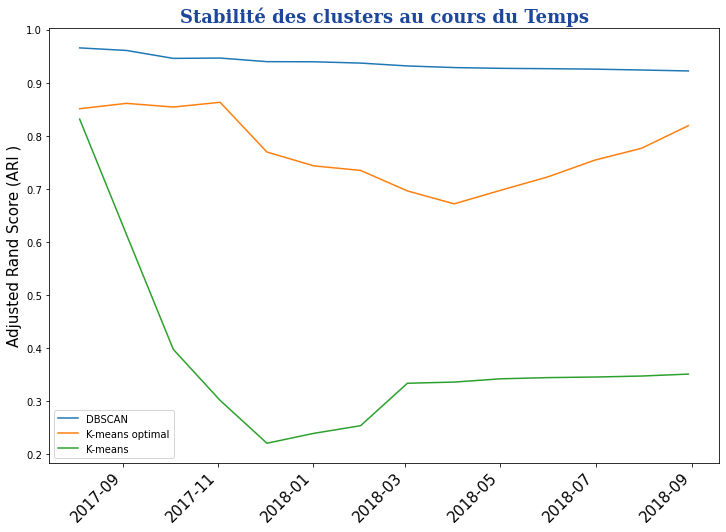

In [146]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
x = ARI_results['Period']
fig = plt.figure(figsize=(12,8))
plt.plot(x, ARI_results['ARI_score_mean_DBSCAN'], label='DBSCAN')
plt.plot(x, ARI_results_optimal['ARI_score_mean_kmeans_optimal'], label='K-means optimal')
plt.plot(x, ARI_results_kmean['ARI_score_mean'], label='K-means')
plt.legend()
plt.title("Stabilité des clusters au cours du Temps", fontdict=font_title, fontsize=18)
plt.xticks(rotation='45', horizontalalignment="right", fontsize=15)
plt.ylabel("Adjusted Rand Score (ARI )", fontsize=15)
plt.show()